<a href="https://colab.research.google.com/github/LucaForziati/musicaClasica_recommendation/blob/main/musicaClasica_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A todo el mundo le gusta la música clásica, solo que aún no lo sabes**

# **1. Descripción de los datos**



Dataset de canciones cargadas a la plataforma de streaming Spotify.

Cada fila representa una canción.

Consta de una gran variedad de features que permiten analizar parametros significativos de las diferentes canciones, tales como "acousticness", "danceability", "energy", entre otras.

Volumen del dataset: 232725 filas x 18 columnas

Fuente: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

# **2. Hipotesis**





Es posible, a partir de ciertas canciones populares, crear un sistema de recomendaciones de música clásica.

# **3. Objetivo y alcance**



El proposito del presente proyecto es crear un sistema de recomendaciones que, a partir de una canción dada por el usuario, el algoritmo devuelva piezas acadamicas-clasicas- con parametros similares al input. De esta forma, el oyente podrá introducirse en el mundo de la música clasica con piezas que tengan parametros similares a las canciones de su agrado.

En base a multiples análisis, se decidió utilizar la similitud coseno para realizar la recomendacion.

# **4. Diccionario de datos**







**1. Objetivo analitico:** crear un algoritmo que sea capaz de recomendar piezas academicas en base a los gustos de un usuario. Ejemplo, el usuario introduce una canción pop X y el algoritmo devuelve X cantidad de piezas academicas que guarden cierta relación con la canción introducida.

**2. Contexto comercial:** Se busca hacer llegar la música academica a una mayor cantidad de personas.

**3. Problemas comerciales contexto:** Los números de las reproduciones de música academica no se encuentran en los parametros deseados, quedando rezagada para un grupo reducido de personas a nivel mundial; por lo tanto, se busca ampliar el grado de alcance.

**4. Análitico. Exploratory Data Analysis (EDA)**

- ¿Existen registros de música academica dentro del dataset?

- ¿Cual es el top 10 de artistas clasicos con mas piezas en el dataset?

- ¿Como se comporta la variable danceability en la musica academica comparado con la totalidad del dataset? ¿Se encuentra por debajo, por arriba o al mismo nivel?

- ¿En la música academica hay una mayor heterogeneidad en la variable "key" que en el total del dataset? ¿Cual es la tonalidad predominante en ambos casos?

-  En la musica academica, ¿Existe alguna relación entre "danceability" y "energy"?

- ¿Como se comporta la variable loudness en la musica academica comparado con la totalidad del dataset? ¿Se encuentra por debajo, por arriba o al mismo nivel?

# 5. ¿Como funciona?

1. En la variable "nombre_artista" que se encuentra en la sección "Buscador de artistas y canciones" se deberá introducir el nombre del artista a buscar.

2. Una vez ejecutado el usuario podrá ver las distintas canciones que contiene el dataset en relación al artista relacionado.

3. Se debe copiar el "track_id".

4. En la variable llamada "playlist_vector" que se encuentra en la seccion "Modelo coseno" se debe copiar el "track_id" dentro del loc, respetando las comillas.

5. Ejecutar los diferentes bloques de codigo y se generará un dataset llamado "recomendaciones" que contedrá el top 15 de canciones que tengan "sim" mas alto.

# 6. Importaciones

In [1]:
pip install squarify

In [2]:
# librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import sys
import joblib

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

import missingno as msno

import squarify
import matplotlib.colors as mcolors

from matplotlib import animation


# 7. Cargar dataset

In [4]:
# dataset spotify

url = "https://raw.githubusercontent.com/LucaForziati/musicaClasica_recommendation/main/SpotifyFeatures.csv"

spotify = pd.read_csv(url)

# 8. Data Wrangling

**Visualizacion del dataset**

In [15]:
# Observamos las primeras 5 filas del dataset.
spotify.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [16]:
# Visualizamos el tamaño del dataset
spotify.shape

(232725, 18)

In [17]:
# Buscamos si el dataset cuenta con canciones del genero musica clasica
print(spotify[spotify["genre"] == "Classical"].shape[0])

9256


Podemos observar que el dataset cuenta con registros donde el genero es musica clasica, esto representado por el termino "Classical". Cuenta con 9256 registros.

In [18]:
# Utilizando la funcion describe obtenemos una primera aproximación a los datos del dataset.
spotify.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


Algo interesante de observar en el describe es que devuelve 11 columnas, cuando el dataset consta de 18 columnas(como se observó con el metodo shape); por lo tanto, eso quiere decir que hay ciertas columnas que no son de tipo int o float.

Otra primera observación es sobre la media y la mediana. Columnas como "popularity", "danceability", "energy", "tempo" y "valence" muestran una gran similitud entre estas dos medidas. Eso podria indicar una distribución simetrica de los datos en esas columnas.

In [19]:
# Utilizamos la funcion info para obtener informacion sobre el tipo de dato de cada columna y si el dataset tiene datos nulos.
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

En una primera observación, el dataset no cuenta con datos nulos. Por otro lado, hay ciertas columnas que no son del tipo de dato deseado. Estas son:

a) genre;

b) artist_name;

c) track_name;

d) track_id;

e) key;

f) mode;

g) time_signature;



**Datos ausentes**

Text(0.5, 1.0, 'Valores faltantes en el dataset')

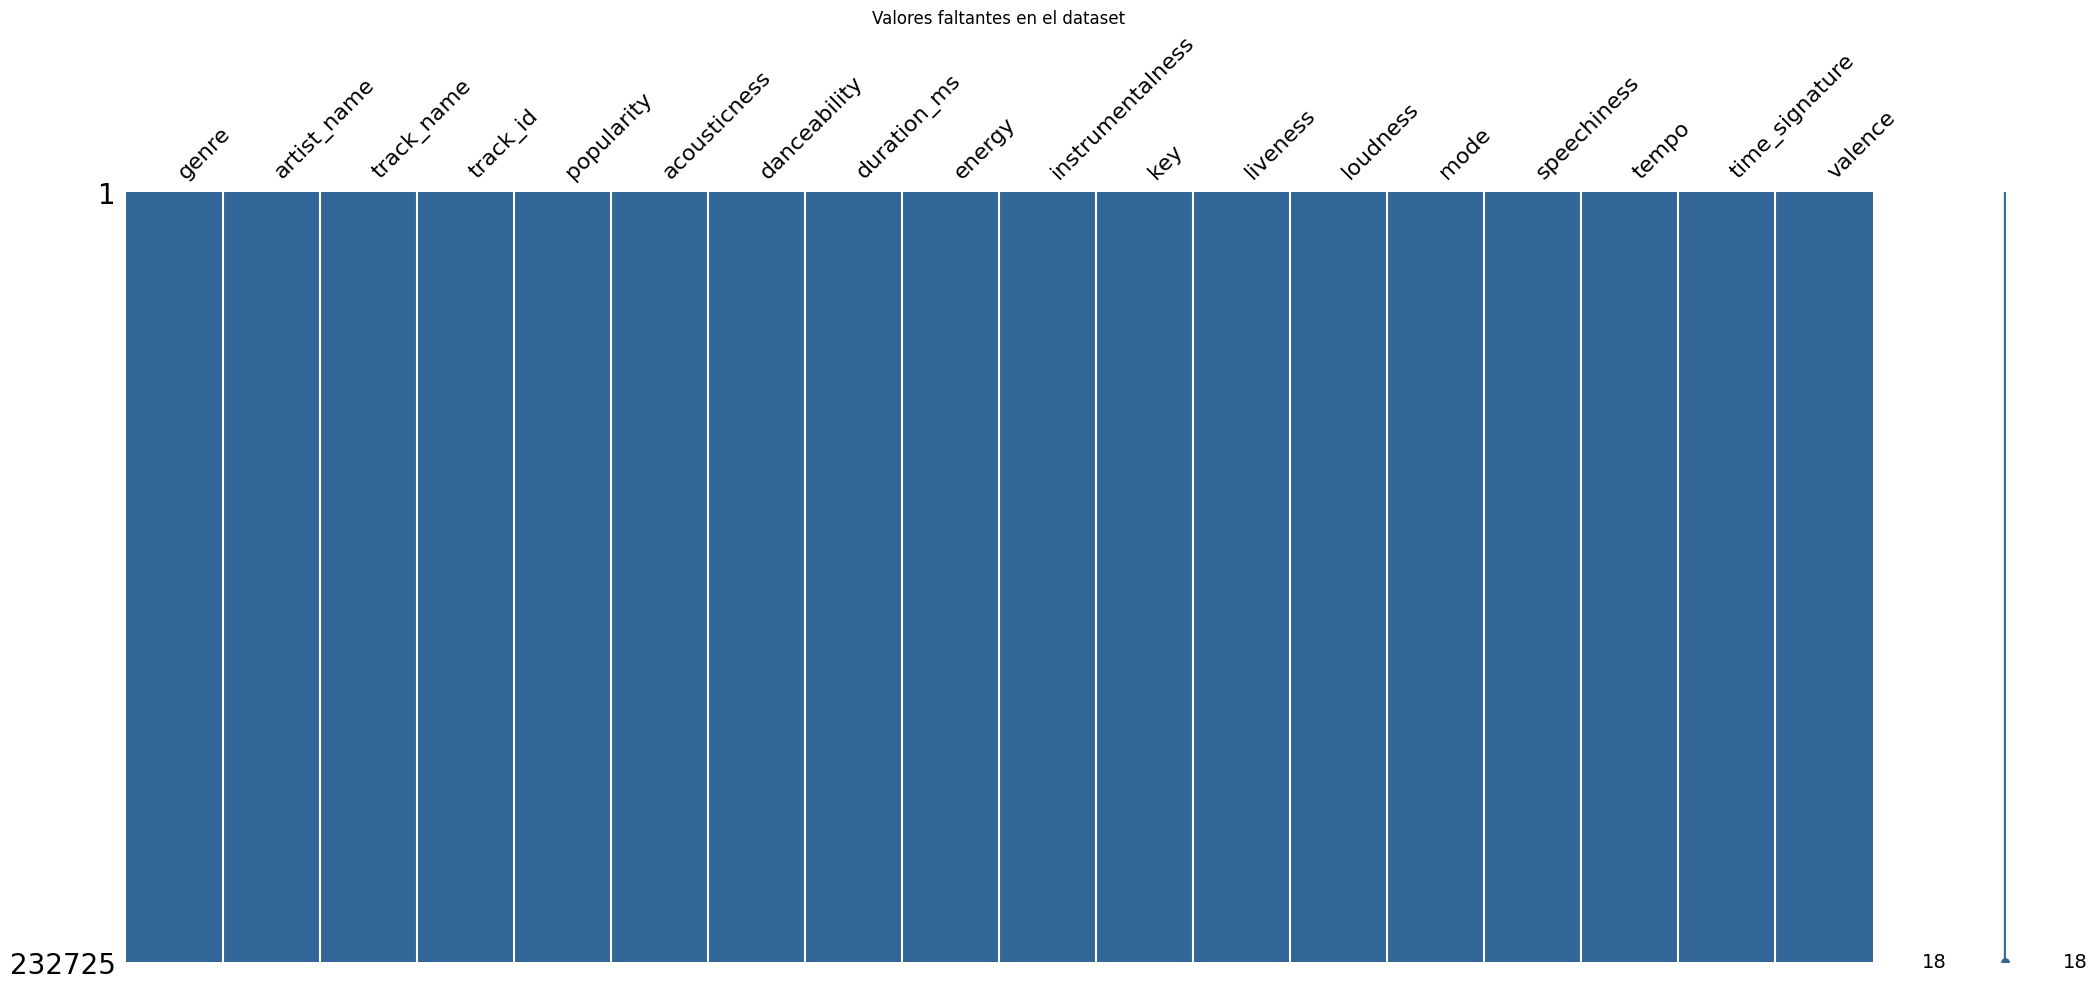

In [20]:
# Utilizamos la libreria de missingno para buscar datos ausentes.

matrix_ax = msno.matrix(spotify, color=(0.2, 0.4, 0.6))
matrix_ax.set_title("Valores faltantes en el dataset")


Como se puede observar gracias a la función de missingno, no hay datos faltantes en el dataset.

**Datos repetidos**

In [21]:
# Visualizamos si hay datos repetidos utilizando la funcion duplicate
valores_duplicados = spotify.duplicated()
valores_duplicados

0         False
1         False
2         False
3         False
4         False
          ...  
232720    False
232721    False
232722    False
232723    False
232724    False
Length: 232725, dtype: bool

In [22]:
# utilizando la funcion value_counts podemos contabilizar la cantidad de filas duplicadas.
valores_duplicados.value_counts()

False    232725
dtype: int64

La cantidad de false coincide con la longitud del dataset; por lo tanto, no hay valores duplicados.

**Crear dataset donde se realizaran transformaciones**

In [23]:
# Guardamos el dataset en otra variable para poder hacer aplicaciones y conservar la integridad del dataset.
spotify_transformer = spotify.copy() # con el metodo copy creamos una copia del dataset y asi evitamos que futuros cambios afecten al dataset original.
spotify_transformer.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**Volver a buscar valores duplicados, esta vez tomando track_id**

In [24]:
diferente_genero = spotify_transformer["track_id"]
spotify_transformer[diferente_genero.isin(diferente_genero[diferente_genero.duplicated()])].sort_values("track_id")

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14492,Dance,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
110840,Pop,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.131000,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
96926,Children’s Music,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.034900,0.564,211789,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
153533,Rock,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,58,0.034900,0.564,211789,0.808,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.365
65253,Folk,Alabama Shakes,Gemini,001ifh9Zkyc5DhK7AGQRtK,42,0.447000,0.411,395573,0.422,0.121000,E,0.0742,-5.475,Minor,0.0459,147.465,1/4,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,Alternative,Bay Faction,Beach Book,7zy2ezQByCeFcaDtsxt77o,40,0.063200,0.537,189750,0.474,0.002590,E,0.0917,-7.440,Minor,0.0500,147.310,4/4,0.474
97007,Children’s Music,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,54,0.000508,0.488,195091,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376
4751,Alternative,Five Finger Death Punch,Dot Your Eyes,7zyJ2g9o0nVOBbDavVveCl,50,0.000508,0.488,195091,0.994,0.000000,C#,0.0623,-3.960,Minor,0.1190,74.011,4/4,0.376
142703,Indie,Moonstar88,Migraine,7zzZmpw8L66ZPjH1M6qmOs,67,0.217000,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221


In [25]:
spotify_transformer.drop_duplicates(subset="track_id", keep="first", inplace=True)

In [26]:
spotify_transformer.shape

(176774, 18)

Si bien la función .duplicated() no arrojaba valores repetidos, si los habia. Esto se debe a que algunas canciones tenian los mismos valores solo que cambiaban de genero. Gracias al track_id, que es el numero unico que se le asigna a una cancion una vez cargada en Spotfy, se pudieron identificar canciones repetidas; siendo estos 91.075 registros. Se eliminaron aquellos registros que presentaban esta particularidad y se optó por conservar el primero en orden de aparición.

**Analisis de la feature "time_signature"**

Text(0.5, 1.0, 'Time Signature Distribution')

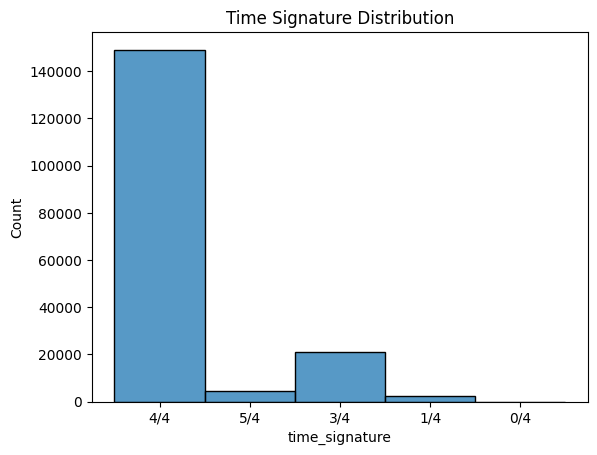

In [27]:
sns.histplot(spotify_transformer['time_signature']).set_title('Time Signature Distribution')

In [28]:
registros_time_signature_0_4 = spotify_transformer[spotify_transformer["time_signature"] == "0/4"]
registros_time_signature_0_4

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14520,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
59106,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14,0.869,0.193,395293,0.107000,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,0/4,0.0377
80544,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12,0.966,0.255,90560,0.045600,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,0/4,0.0349
82665,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12,0.973,0.301,197333,0.105000,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,0/4,0.2470
167567,Comedy,Ron White,Good to Be in Austin/Airport Security/Broke Tooth,0LMQasA6Y5UEMuWzRY5aSX,41,0.942,0.440,290123,0.532000,0.000000,F,0.9060,-20.569,Major,0.9440,83.029,0/4,0.0672
208898,World,Aphex Twin,Nanou2,6Wei2NUSG66WzLiqSuQAy5,41,0.977,0.338,205187,0.000982,0.239000,G#,0.0966,-28.820,Major,0.0465,93.066,0/4,0.0776


In [29]:
registros_time_signature_1_4 = spotify_transformer[spotify_transformer["time_signature"] == "1/4"]
registros_time_signature_1_4

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
29,Movie,Chorus,Mangani – Do Banjare / Amba Heth,1KIKeCTNJKYpQK5X5Sqc1v,0,0.1840,0.695,430240,0.5000,0.000328,A,0.3300,-10.217,Minor,0.0351,112.965,1/4,0.756
50,Movie,Claire Guyot,Le silence,24XhoLQObCUbk4ybOWtrZl,1,0.9020,0.489,128871,0.2600,0.000683,A#,0.0944,-11.876,Major,0.0884,93.186,1/4,0.371
55,Movie,Justin Hurwitz,"Rialto - From ""La La Land"" Score",2BcLdx9G6GF32IWlvb1UGa,3,0.9670,0.550,28027,0.0148,0.060800,G#,0.0793,-22.731,Major,0.0492,74.756,1/4,0.592
62,Movie,Henri Salvador,Malgré tes serments,2TXdgzpGp97Wrb23ue9rVk,0,0.9830,0.341,136253,0.1560,0.041800,A#,0.2320,-14.696,Major,0.0312,84.488,1/4,0.336
74,Movie,Jean Claude Corbel,Le Vilain Petit Canard 2,2j6xLFrJ3gp233MLhaMqHX,0,0.6950,0.710,492813,0.2310,0.000000,F,0.1760,-16.156,Minor,0.8740,110.924,1/4,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232312,Soul,Croosh,Kiki,2Pdn3Py7bbOoS0mh2qLcK6,39,0.1510,0.651,168276,0.4390,0.000000,F#,0.0978,-9.548,Minor,0.3940,81.361,1/4,0.572
232375,Soul,SOHN,Red Lines,5nNRGtgS9d1vcxFCZuAA8r,47,0.7210,0.672,236630,0.3890,0.645000,A,0.1020,-10.369,Minor,0.0450,140.012,1/4,0.235
232445,Soul,IDER,Body Love,4heNDDww6hPUZYqU79AikG,41,0.9000,0.768,221684,0.2560,0.000890,G#,0.1000,-13.998,Minor,0.0606,142.585,1/4,0.242
232610,Soul,Sofi de la Torre,Voicebreaks,4832iVETghMVt43wwsac3d,43,0.8390,0.452,200000,0.2290,0.000000,A#,0.1260,-12.829,Major,0.1220,95.618,1/4,0.165


Observamos que hay registros que cuentan con un valor de time_signature que no pueden existir, como "0/4" o "1/4". Como los valores de "0/4" representan una parte infima del dataset y no cuenta con registros de musica clasica"; se procederá a eliminarlos. Por otro lado, se entenderá que los registros "1/4" representan un error a la hora de cargar los datos; resultando el correcto "4/4". Para este caso, se procederá a modificar su valor, cambiando "1/4" por "4/4". No se borran los registros porque cuentan con música clásica.

In [30]:
# eliminar del dataset aquellos registros donde "time_signature" = "0/4"
spotify_transformer = spotify_transformer[spotify_transformer["time_signature"] != "0/4"]

In [31]:
# transformar aquellos datos donde "time_signature" = "1/4" a "4/4"
spotify_transformer['time_signature'] = spotify_transformer['time_signature'].replace(['1/4'],'4/4')

<ipython-input-31-43800ec2cb1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_transformer['time_signature'] = spotify_transformer['time_signature'].replace(['1/4'],'4/4')


Text(0.5, 1.0, 'Time Signature Distribution')

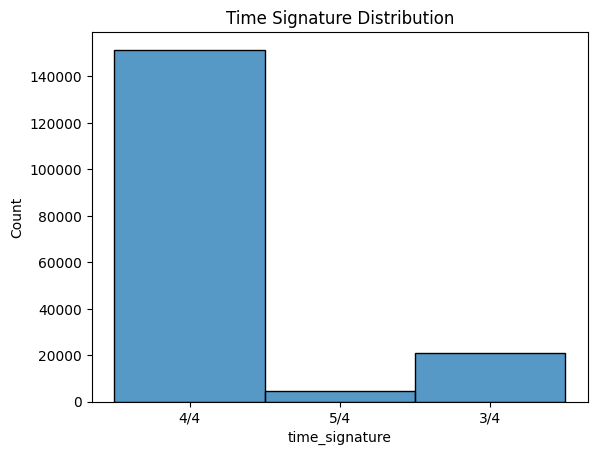

In [32]:
sns.histplot(spotify_transformer['time_signature']).set_title('Time Signature Distribution')

En el nuevo grafico de barras se puede observar que el dataset ya no cuenta con registros donde "time_signature" sea igual a "0/4" o a "1/4".

**Eliminar columnas que no son de interes para el presente proyecto**

In [33]:
spotify_transformer = spotify_transformer.drop("duration_ms", axis=1)

Se elimina del dataset la columna "durantion_ms" porque no agrega ningun valor al presente proyecto; esto se debe a que la duracion en milisegundos no va a agregar poder predictivo al modelo ya que, en general, las piezas de musica clasica tienen mayor duración que las canciones de musica popular; por lo tanto, para no confundir al modelo con dicho parametro, se decide eliminarla.

In [34]:
spotify_transformer.shape

(176768, 17)

El tamaño actual del dataset luego de las transformaciones y eliminaciones realizadas es de 80.508 filas y 17 columnas.

In [35]:
# Establecemos la columna track_id como indice.
spotify_transformer.set_index('track_id', inplace=True)

Se optó por establecer el track_id como indice porque es el codigo unico con el cual Spotify almacena las canciones. Esta decision nos va a permitir en un futuro poder ampliar el dataset y evitar problemas de duplicados.

**Convertir los datos que estan en string a int**

In [36]:
# Funcion para transformar los valores no numericos a numericos y ademas crear un dataframe con los valores originales.

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()
LE = LabelEncoder()

def valores_originales(columna):
  # Aplicar LabelEncoder a la columna
  transformed_columna = label_encoder.fit_transform(spotify_transformer[columna])

  # Obtener los valores originales
  original_columna = label_encoder.inverse_transform(transformed_columna)

  # Crear un nuevo DataFrame con las columnas originales y transformadas
  new_df = pd.DataFrame({"columna_original": original_columna, "columna_transformed": transformed_columna})

  # Eliminar valores duplicados y mantener solo una entrada por género
  if (columna == "genre" or columna == "key" or columna == "time_signature" or columna == "mode"):
    unique_columna = new_df.drop_duplicates(subset="columna_transformed")
    spotify_transformer[columna] = LE.fit_transform(spotify_transformer[columna])
    return unique_columna
  else:
    spotify_transformer[columna] = LE.fit_transform(spotify_transformer[columna])
    return new_df


  # Transformar al valor
  spotify_transformer[columna] = LE.fit_transform(spotify_transformer[columna])


In [37]:
identificador_tonalidad = valores_originales("key")
identificador_tonalidad

,columna_original,columna_transformed
0,C#,4
1,F#,9
2,C,3
4,F,8
9,G,10
10,E,7
13,D#,6
15,G#,11
16,D,5
25,A#,1


In [38]:
identificador_tiempo = valores_originales("time_signature")
identificador_tiempo

,columna_original,columna_transformed
0,4/4,1
2,5/4,2
13,3/4,0


In [39]:
identificador_modo = valores_originales("mode")
identificador_modo

,columna_original,columna_transformed
0,Major,0
1,Minor,1


In [40]:
identificador_nombre_cancion = valores_originales("track_name")
identificador_nombre_cancion

,columna_original,columna_transformed
0,C'est beau de faire un Show,18317
1,Perdu d'avance (par Gad Elmaleh),92820
2,Don't Let Me Be Lonely Tonight,32139
3,Dis-moi Monsieur Gordon Cooper,30946
4,Ouverture,90652
...,...,...
176763,Quickly (feat. Brandy),97937
176764,P.O.P.,90984
176765,I'll Take Care Of You - Single Version,56685
176766,Burning Fire,17927


In [41]:
spotify_transformer

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,18317,0,0.6110,0.389,0.910,0.000000,4,0.3460,-1.828,0,0.0525,166.969,1,0.814
0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,92820,1,0.2460,0.590,0.737,0.000000,9,0.1510,-5.559,1,0.0868,174.003,1,0.816
0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,32139,3,0.9520,0.663,0.131,0.000000,3,0.1030,-13.879,1,0.0362,99.488,2,0.368
0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,30946,0,0.7030,0.240,0.326,0.000000,4,0.0985,-12.178,0,0.0395,171.758,1,0.227
0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,90652,4,0.9500,0.331,0.225,0.123000,8,0.2020,-21.150,0,0.0456,140.576,1,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1U0OMWvR89Cm20vCNar50f,Soul,John Legend,97937,39,0.2310,0.736,0.701,0.000000,1,0.2030,-4.345,1,0.1000,99.991,1,0.770
2gGqKJWfWbToha2YmDxnnj,Soul,Belly,90984,43,0.1040,0.802,0.516,0.000485,5,0.1050,-9.014,0,0.2130,175.666,1,0.482
2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",56685,32,0.5660,0.423,0.337,0.000000,1,0.2760,-13.092,1,0.0436,80.023,1,0.497


Ahora todas las columnas del dataset, menos "artist_name", están en formato int o float; lo cual nos va a permitir usar los diferentes modelos.

La feature "artist_name" por ahora se mantendrá con su tipo actual. Esto porque será de utilidad para separar el dataset. Luego se procederá a realizar su transformación.

In [42]:
# volvemos a imprimir el describe para ver como quedaron los datos luego de transformarlos.
spotify_transformer.describe()

,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000,176768.000000
mean,73851.149003,36.273375,0.404121,0.541074,0.557036,0.172072,5.349673,0.224530,-10.137261,0.340299,0.127391,117.203793,0.907359,0.451606
std,42611.461783,17.390940,0.366296,0.190385,0.275834,0.322936,3.462662,0.211023,6.395240,0.473811,0.204338,31.325309,0.366308,0.267817
min,0.000000,0.000000,0.000000,0.056900,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000
25%,37190.750000,25.000000,0.045600,0.415000,0.344000,0.000000,3.000000,0.097500,-12.850000,0.000000,0.036800,92.006000,1.000000,0.222000
50%,73729.500000,37.000000,0.288000,0.558000,0.592000,0.000070,5.000000,0.130000,-8.191000,0.000000,0.049400,115.006500,1.000000,0.440000
75%,110588.000000,49.000000,0.791000,0.683000,0.789000,0.090800,8.000000,0.277000,-5.631000,1.000000,0.102000,138.799250,1.000000,0.667000
max,148393.000000,100.000000,0.996000,0.989000,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,2.000000,1.000000


In [43]:
# volvemos a imprimir el info para ver como quedaron los datos luego de transformarlos.
spotify_transformer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176768 entries, 0BRjO6ga9RKCKjfDqeFgWV to 34XO9RwPMKjbvRry54QzWn
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176768 non-null  object 
 1   artist_name       176768 non-null  object 
 2   track_name        176768 non-null  int64  
 3   popularity        176768 non-null  int64  
 4   acousticness      176768 non-null  float64
 5   danceability      176768 non-null  float64
 6   energy            176768 non-null  float64
 7   instrumentalness  176768 non-null  float64
 8   key               176768 non-null  int64  
 9   liveness          176768 non-null  float64
 10  loudness          176768 non-null  float64
 11  mode              176768 non-null  int64  
 12  speechiness       176768 non-null  float64
 13  tempo             176768 non-null  float64
 14  time_signature    176768 non-null  int64  
 15  valence           176768 non-null  f

In [44]:
# función para que se muestren todas las features.
pd.set_option('display.max_columns', None)

In [45]:
# Llevando a escala la variable 'popularity', 'tempo' y 'loundness'.

# Crear una instancia del escalador min-max
scaler = MinMaxScaler()

# Ajustar y transformar la columna 'popularity'
spotify_transformer['popularity'] = scaler.fit_transform(spotify_transformer[['popularity']])
spotify_transformer['tempo'] = scaler.fit_transform(spotify_transformer[['tempo']])

# Eliminar aquellos valores para los cuales loudness es mayor a 0. Aquellos registros que reciben estos valores no son
# del genero musica clasica y a la hora de aplicar su absoluto podria traer complicaciones.
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["loudness"] > 0].index)

# Pasar loudness a valor absoluto y a escala
spotify_transformer["loudness"] = spotify_transformer["loudness"].abs()
spotify_transformer["loudness"] = scaler.fit_transform(spotify_transformer[['loudness']])

Creando el dataset de musica clasica.

In [46]:
# Lista de artistas que deseamos mantener en el nuevo dataset
artistas_clasicos = [
    "Johann Sebastian Bach", "Wolfgang Amadeus Mozart", "Ludwig van Beethoven",
    "Frédéric Chopin", "Claude Debussy", "Franz Schubert", "Philip Glass",
    "Camille Saint-Saëns", "Maurice Ravel", "Franz Liszt", "Erik Satie",
    "Robert Schumann", "Richard Strauss", "Johann Pachelbel", "Antonio Vivaldi",
    "Gabriel Fauré", "Pyotr Ilyich Tchaikovsky", "Carl Philipp Emanuel Bach",
    "Sergei Prokofiev", "Franz Joseph Haydn", "Richard Wagner", "Johann Strauss II",
    "Béla Bartók", "Sergei Rachmaninoff", "Antonín Dvořák", "Felix Mendelssohn",
    "Gustav Mahler", "Johannes Brahms"
]

# Filtrar las canciones con artistas clásicos
dataset_musica_academica = spotify_transformer[spotify_transformer['artist_name'].isin(artistas_clasicos)].copy()

Este dataset fue creado porque, al visualizar los artisitas donde su genero era "Classical"(musica clasica) habia algunos registros que, en si, no era musica clasica. Por ello, se optó por crear un nuevo dataset con artistas clasicos. Este detaset luego serviria para realizar las predicciones.

**Creando dataset que contiene todos los registros donde el genero no es musica clasica**

In [47]:
# Crear un nuevo dataset que contenga todos los registros que no sean musica clasica
dataset_canciones = spotify_transformer[spotify_transformer['genre'] != 1].copy()

Este vasto segundo dataset llamado "dataset_canciones" servira para que los usuarios puedan seleccionar canciones que sean de su preferencia. Luego, gracias a la similitud coseno se buscará un top 15 de canciones de musica clasica que contegan parametros similares.

**Eliminar generos que no son de interes para el presente proyecto**

In [48]:
"""
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Comedy"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Children's Music"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Children’s Music"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Opera"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Movie"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "A Capella"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Anime"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "World"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Soundtrack"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Alternative"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "R&B"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Folk"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Ska"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Indie"].index)
dataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Soul"].index)
"""

'\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Comedy"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Children\'s Music"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Children’s Music"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Opera"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Movie"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "A Capella"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Anime"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "World"].index)\ndataset_canciones = dataset_canciones.drop(dataset_canciones[dataset_canciones["genre"] == "Soundtrack"].

In [49]:
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Comedy"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Children's Music"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Children’s Music"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Opera"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Movie"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "A Capella"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Anime"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Soundtrack"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "R&B"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Folk"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Ska"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Indie"].index)
spotify_transformer = spotify_transformer.drop(spotify_transformer[spotify_transformer["genre"] == "Soul"].index)

Se decidió eliminar los generos que se visualizan en el codigo anterior porque, por el momento, no agregan valor al presente proyecto. Esto porque, el proyecto solo se va a direccionar a determinados generos, que son los que se conservan.

**Eliminar columnas de ambos datasets**

In [50]:
# Eliminar columnas del dataset de musica clasica
dataset_musica_academica = dataset_musica_academica.drop("genre", axis=1)
dataset_musica_academica = dataset_musica_academica.drop("artist_name", axis=1)
dataset_musica_academica = dataset_musica_academica.drop("track_name", axis=1)


# Eliminar columnas del dataset que no contiene musica clasica
dataset_canciones = dataset_canciones.drop("genre", axis=1)
dataset_canciones = dataset_canciones.drop("artist_name", axis=1)
dataset_canciones = dataset_canciones.drop("track_name", axis=1)


Se eliminaron de ambos datasets aquellas columnas que, en principio, no agregan poder predictivo al modelo. Esto se debe a que, tambien en principio, el nombre de la cancion, el nombre del artista y el genero pueden confundir al modelo agregando parametros que no describen musicalmente a una cancion.

Se elimino el genero porque, al haber realizado la separacion, ya no resulta de interes conocer el genero del dataset "dataset_canciones".

El nombre de la cancion y del artista se le devolverá al artista en su forma original. Si bien es cierto que estas columnas se eliminaron del dataset "dataset_canciones", aun estan presentes en "spotify_transformer". A traves del track_id y la funcion valores_originales() se buscaran los valores originales.

In [51]:
identificador_nombre_artista = valores_originales("artist_name")
identificador_nombre_artista

,columna_original,columna_transformed
0,Joji,4348
1,Joji,4348
2,Joji,4348
3,Oliver Tree,6468
4,Joji,4348
...,...,...
97519,Fleetwood Mac,2933
97520,The Doors,8525
97521,Black Sabbath,1039
97522,The Beatles,8408


In [52]:
identificador_generos = valores_originales("genre")
identificador_generos

,columna_original,columna_transformed
0,Alternative,0
17,Country,3
8305,Dance,4
20660,Electronic,5
30347,Blues,1
38061,Hip-Hop,6
42343,Rap,9
46531,Classical,2
47825,Pop,8
50660,Reggae,10


In [53]:
dataset_canciones

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,0.00,0.6110,0.389,0.910,0.000000,4,0.3460,0.034848,0,0.0525,0.642704,1,0.814
0BjC1NfoEOOusryehmNudP,0.01,0.2460,0.590,0.737,0.000000,9,0.1510,0.105973,1,0.0868,0.675801,1,0.816
0CoSDzoNIKCRs124s9uTVy,0.03,0.9520,0.663,0.131,0.000000,3,0.1030,0.264579,1,0.0362,0.325182,2,0.368
0Gc6TVm52BwZD07Ki6tIvf,0.00,0.7030,0.240,0.326,0.000000,4,0.0985,0.232152,0,0.0395,0.665238,1,0.227
0IuslXpMROHdEPvSl1fTQK,0.04,0.9500,0.331,0.225,0.123000,8,0.2020,0.403187,0,0.0456,0.518516,1,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1U0OMWvR89Cm20vCNar50f,0.39,0.2310,0.736,0.701,0.000000,1,0.2030,0.082830,1,0.1000,0.327549,1,0.770
2gGqKJWfWbToha2YmDxnnj,0.43,0.1040,0.802,0.516,0.000485,5,0.1050,0.171836,0,0.2130,0.683626,1,0.482
2iZf3EUedz9MPqbAvXdpdA,0.32,0.5660,0.423,0.337,0.000000,1,0.2760,0.249576,1,0.0436,0.233592,1,0.497


**Outliers y distribucion- dataset_canciones**

Mediante el grafico de boxplot se buscan outliers en el dataset.

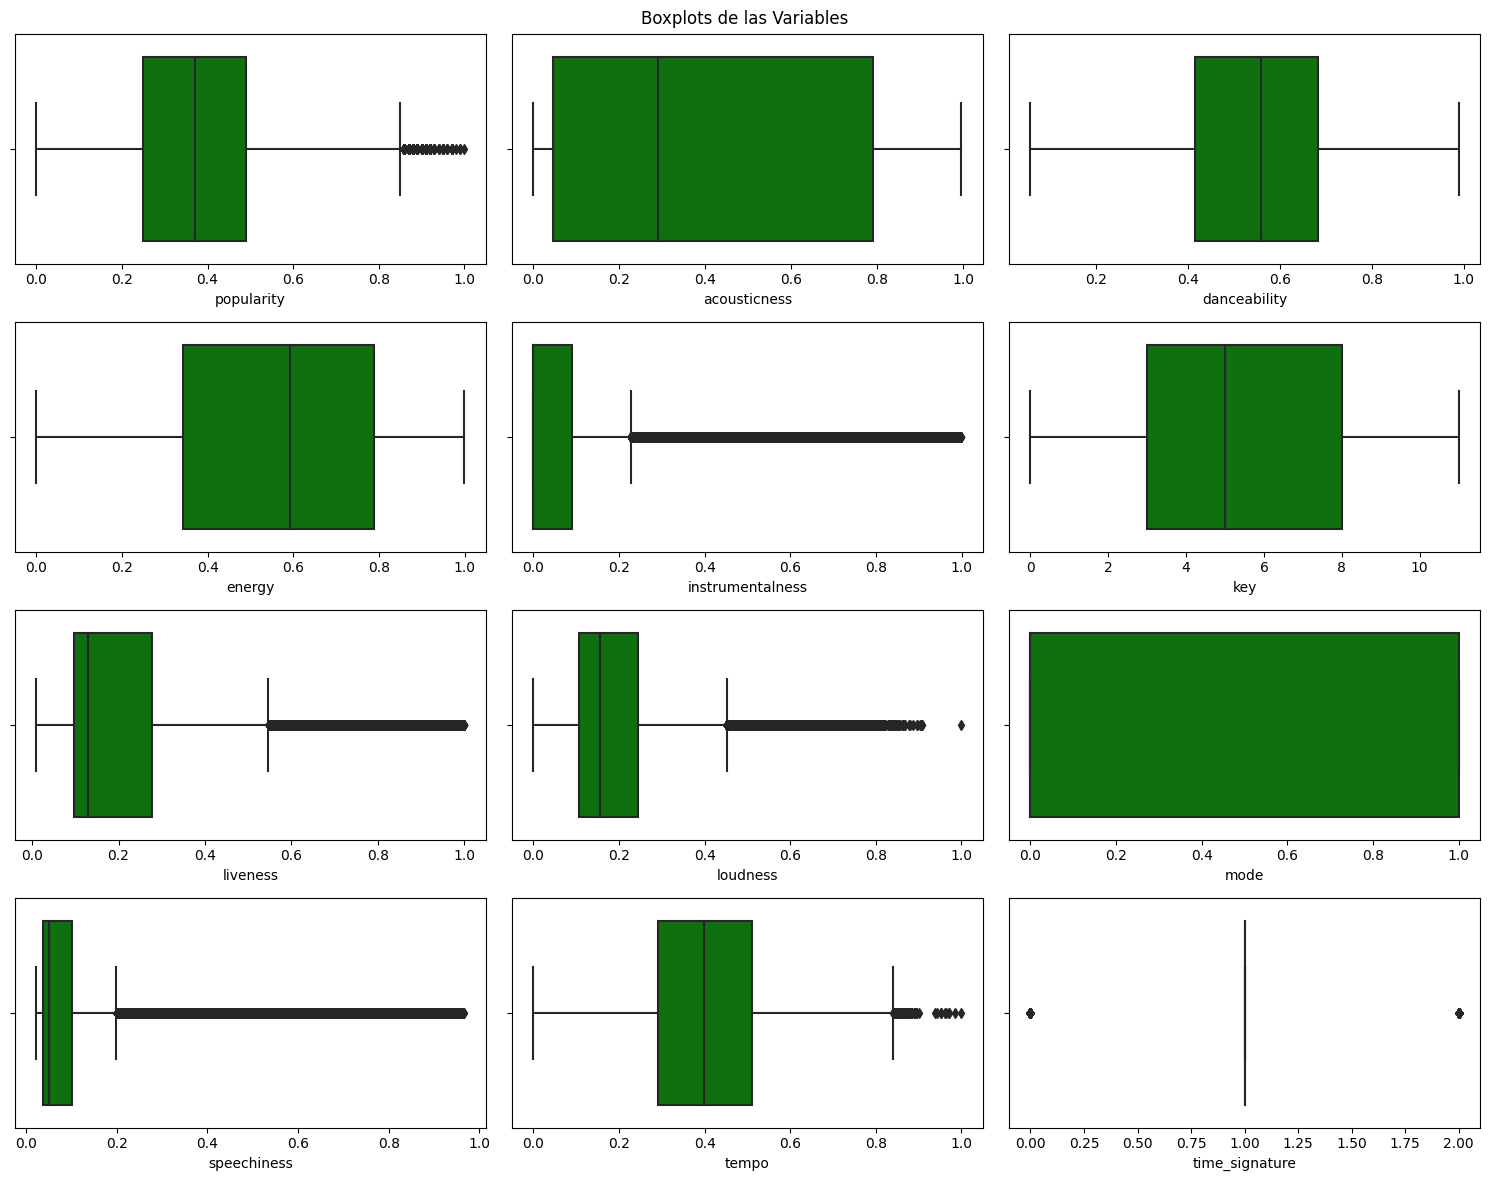

In [54]:
# Grafico de boxplot

def boxplots(df):
    k = 0 # declara y asigna la variable k que luego será de utilidad para recorrer las columnas. En este caso es igual a 1 para evitar que se muestre
    cols = df.columns[:-1]
    n = 4 # declara y asigna la variable n que despues sera la cantidad de filas del grafico
    m = 3 # declara y asigna la variable m que despues sera la cantidad de columnas del grafico
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 12)) # Crea el lienzo del grafico
    #if (k > 17):
    #  None
    #else:
    for i in range(n): # recorre usando un for las filas
        for j in range(m): # recorre usando un for las columnas
            if k <= len(cols): # para evitar un indexerror, se agrega un if para que cuando llegue a la cantidad de columnas, se deje de recorrer el array.
                sns.boxplot(df, x=df[df.columns[k]], ax=axes[i][j], color = 'g') # crea el boxplot
                k += 1

    fig.suptitle('Boxplots de las Variables')
    plt.tight_layout()
    plt.show()

boxplots(dataset_canciones)



In [55]:
# calculo de los intercuartiles
Q1 = dataset_canciones.quantile(0.25) # se utiliza el metodo quantile
Q3 = dataset_canciones.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dataset_canciones > (Q3 + 1.5 * IQR))).sum() # calculo de los ouliders superiores al 75%

print("Cantidad de outliers por columna:")
print(outliers)

Cantidad de outliers por columna:
popularity            175
acousticness            0
danceability            0
energy                  0
instrumentalness    38715
key                     0
liveness            17664
loudness             8621
mode                    0
speechiness         25678
tempo                 108
time_signature       4429
valence                 0
dtype: int64


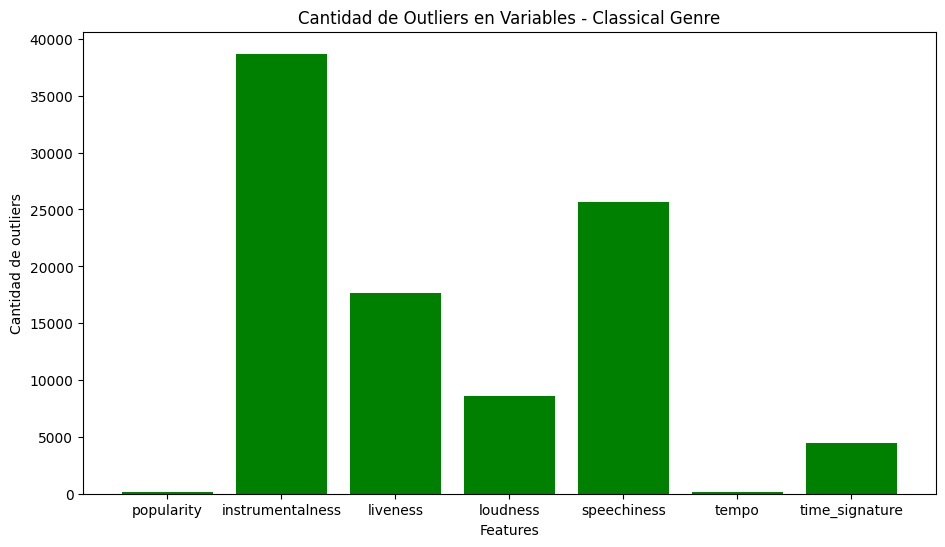

In [56]:
# Calculo de los intercuartiles
Q1 = dataset_canciones.quantile(0.25)
Q3 = dataset_canciones.quantile(0.75)
IQR = Q3 - Q1

# Cálculo de los outliers superiores al 75%
outliers = ((dataset_canciones > (Q3 + 1.5 * IQR))).sum()

# Filtrar las columnas con outliers no igual a cero
outliers_nonzero = outliers[outliers != 0]

# Ajustar el tamaño del lienzo
fig, ax = plt.subplots(figsize=(11, 6))  # Puedes cambiar los valores (ancho, alto) según tus preferencias

# Crear el gráfico de barras
ax.bar(outliers_nonzero.index, outliers_nonzero.values, color = "g")

# Agregar etiquetas y título
ax.set_xlabel('Features')
ax.set_ylabel('Cantidad de outliers')
ax.set_title('Cantidad de Outliers en Variables - Classical Genre')

# Mostrar el gráfico
plt.show()

Se visualiza la presencia de varios outliers. En un principio, se buscara eliminarlos.

In [57]:
# Obtén una lista de nombres de las columnas con outliers
columnas_con_outliers = outliers_nonzero.index.tolist()

# Elimina los outliers de cada columna en el DataFrame
for columna in columnas_con_outliers:
    Q1 = dataset_canciones[columna].quantile(0.25)
    Q3 = dataset_canciones[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra solo los valores dentro de los límites
    dataset_canciones = dataset_canciones[(dataset_canciones[columna] >= limite_inferior) & (dataset_canciones[columna] <= limite_superior)]

In [58]:
dataset_canciones.shape

(94575, 13)

Se eliminaron del dataset "dataset_canciones" todos los outliers que se han detectado, quedando en dataset con un tamaño de 52.548 registros.

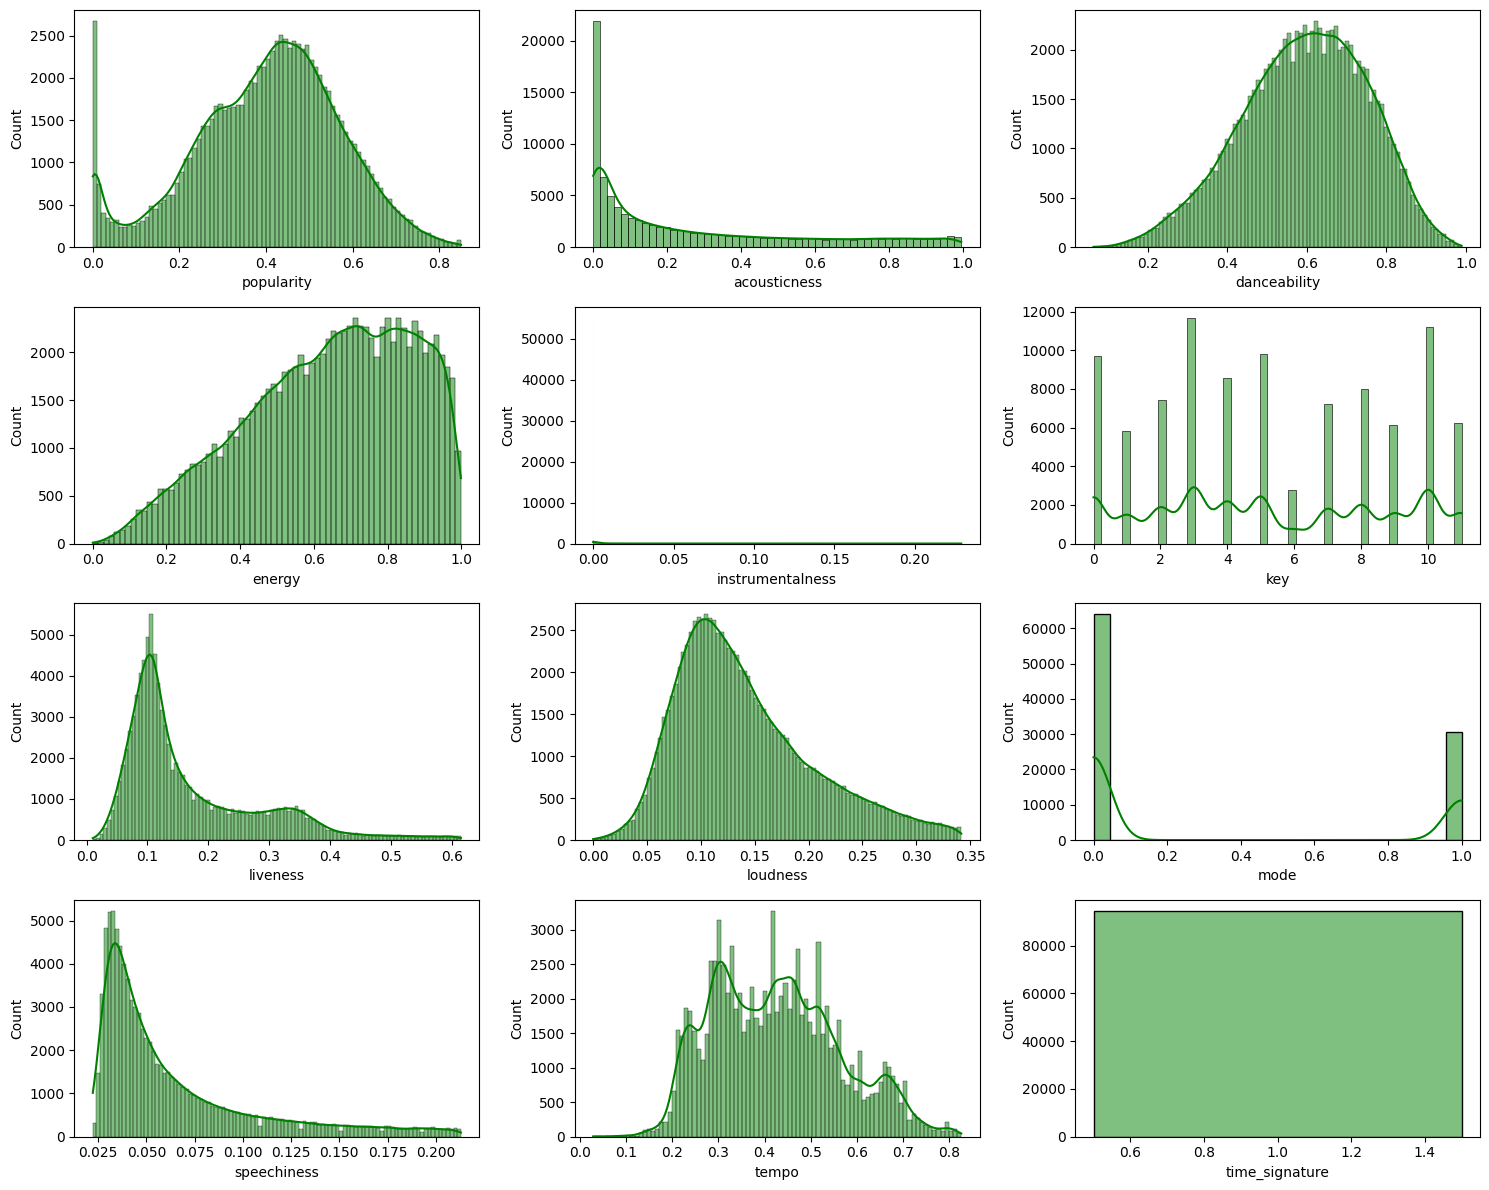

In [59]:
def histplots(df):
    k = 0 # declara y asigna la variable k que luego será de utilidad para recorrer las columnas. En este caso es igual a 1 para evitar que se muestre
    cols = df.columns[:-1]
    n = 4 # declara y asigna la variable n que despues sera la cantidad de filas del grafico
    m = 3 # declara y asigna la variable m que despues sera la cantidad de columnas del grafico
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 12)) # Crea el lienzo del grafico
    #if (k > 17):
    #  None
    #else:
    for i in range(n): # recorre usando un for las filas
        for j in range(m): # recorre usando un for las columnas
            if k <= len(cols): # para evitar un indexerror, se agrega un if para que cuando llegue a la cantidad de columnas, se deje de recorrer el array.
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, color='g') # crea el boxplot
                k += 1

    plt.tight_layout()
    plt.show()

histplots(dataset_canciones)

In [60]:
spotify_transformer.describe()

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000,97524.000000
mean,5.844192,4861.161314,72927.244073,0.425815,0.303250,0.580855,0.601437,0.159220,5.340347,0.198070,0.171306,0.366782,0.091245,0.418981,0.939235,0.481077
std,4.098792,2853.229533,42115.589963,0.144327,0.328477,0.181315,0.252592,0.309680,3.483529,0.174561,0.113581,0.481929,0.095219,0.143179,0.295850,0.258716
min,0.000000,0.000000,2.000000,0.000000,0.000001,0.056900,0.000020,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.015123,0.000000,0.000000
25%,2.000000,2454.000000,36422.500000,0.330000,0.028800,0.463000,0.450000,0.000000,3.000000,0.095100,0.100463,0.000000,0.036600,0.301844,1.000000,0.268000
50%,5.000000,4666.000000,73140.500000,0.420000,0.159000,0.600000,0.647000,0.000057,5.000000,0.125000,0.136760,0.000000,0.049900,0.414777,1.000000,0.481000
75%,10.000000,7283.000000,109394.250000,0.520000,0.518000,0.718000,0.801000,0.063200,8.000000,0.244000,0.199135,1.000000,0.098800,0.515993,1.000000,0.692000
max,13.000000,9857.000000,148393.000000,1.000000,0.996000,0.987000,0.999000,0.996000,11.000000,1.000000,1.000000,1.000000,0.943000,1.000000,2.000000,0.992000


**Outliers y distribucion - dataset_musica_academica**

In [61]:
dataset_musica_academica.shape

(5322, 13)

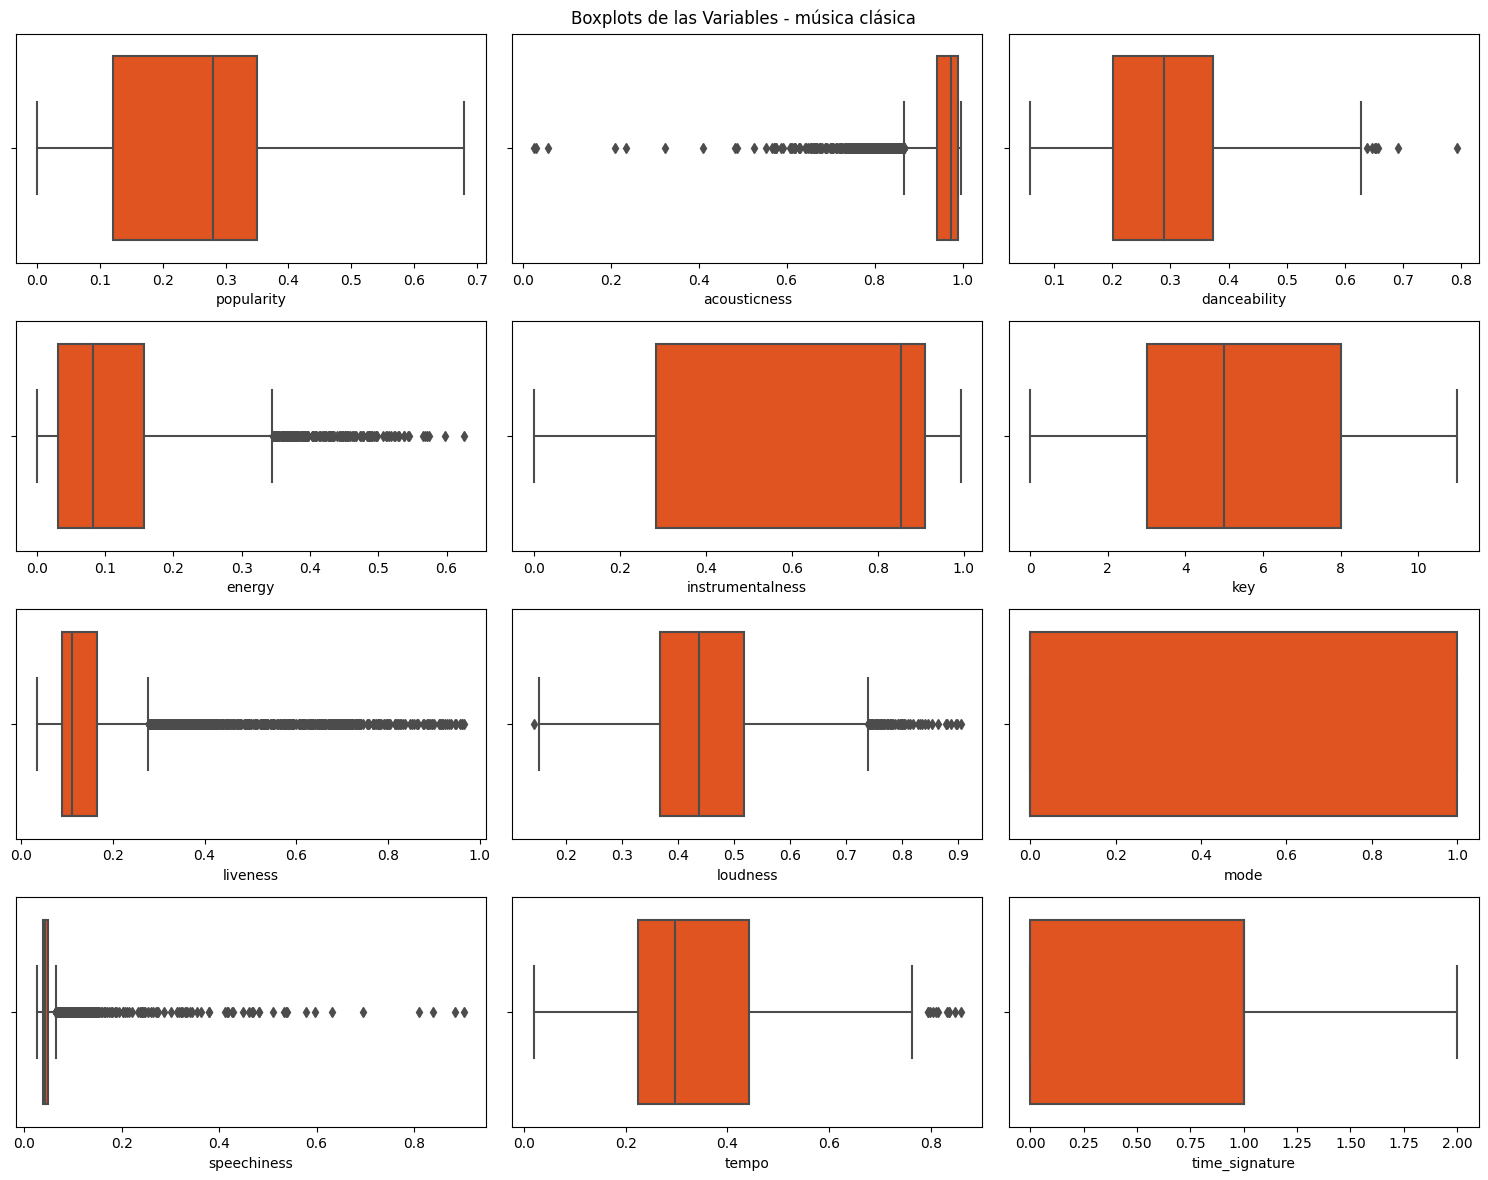

In [62]:
def boxplots_classical(df):
    k = 0 # declara y asigna la variable k que luego será de utilidad para recorrer las columnas. En este caso es igual a 1 para evitar que se muestre
    cols = df.columns[:-1]
    n = 4 # declara y asigna la variable n que despues sera la cantidad de filas del grafico
    m = 3 # declara y asigna la variable m que despues sera la cantidad de columnas del grafico
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 12)) # Crea el lienzo del grafico
    #if (k > 17):
    #  None
    #else:
    for i in range(n): # recorre usando un for las filas
        for j in range(m): # recorre usando un for las columnas
            if k <= len(cols): # para evitar un indexerror, se agrega un if para que cuando llegue a la cantidad de columnas, se deje de recorrer el array.
                sns.boxplot(df, x=df[df.columns[k]], ax=axes[i][j], color='orangered') # crea el boxplot
                k += 1
    fig.suptitle('Boxplots de las Variables - música clásica')
    plt.tight_layout()
    plt.show()

boxplots_classical(dataset_musica_academica)

In [63]:
# calculo de los intercuartiles
Q1_classical = dataset_musica_academica.quantile(0.25) # se utiliza el metodo quantile
Q3_classical = dataset_musica_academica.quantile(0.75)
IQR_classical = Q3_classical - Q1_classical

outliers_classical = ((dataset_musica_academica > (Q3_classical + 1.5 * IQR_classical))).sum() # calculo de los ouliders superiores al 75%

print("Cantidad de outliers por columna:")
print(outliers_classical)

Cantidad de outliers por columna:
popularity            0
acousticness          0
danceability          8
energy              179
instrumentalness      0
key                   0
liveness            719
loudness             67
mode                  0
speechiness         401
tempo                11
time_signature        0
valence             314
dtype: int64


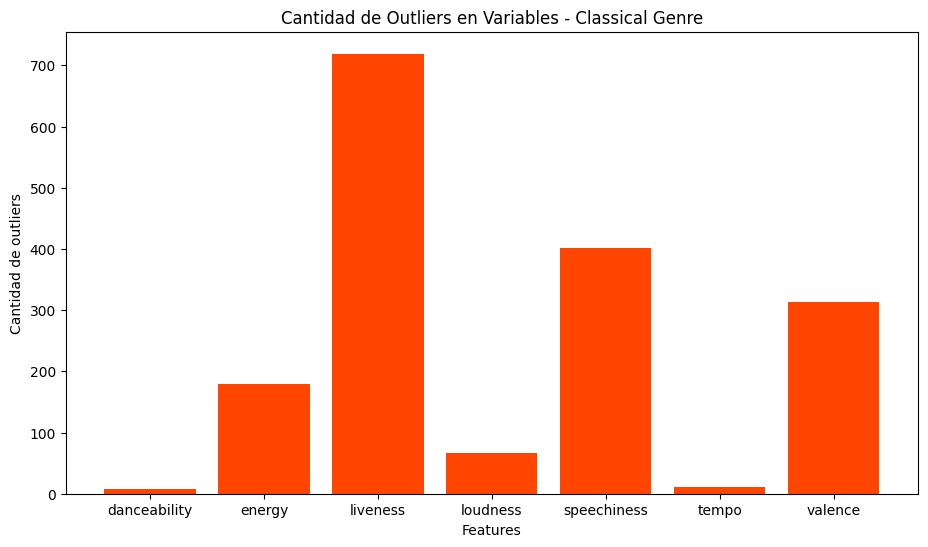

In [64]:

# Filtrar las columnas con outliers no igual a cero
outliers_nonzero = outliers_classical[outliers_classical != 0]

# Ajustar el tamaño del lienzo
fig, ax = plt.subplots(figsize=(11, 6))  # Puedes cambiar los valores (ancho, alto) según tus preferencias

# Crear el gráfico de barras
ax.bar(outliers_nonzero.index, outliers_nonzero.values, color = "orangered")

# Agregar etiquetas y título
ax.set_xlabel('Features')
ax.set_ylabel('Cantidad de outliers')
ax.set_title('Cantidad de Outliers en Variables - Classical Genre')

# Mostrar el gráfico
plt.show()

In [65]:
# Obtén una lista de nombres de las columnas con outliers
columnas_con_outliers = outliers_nonzero.index.tolist()

# Elimina los outliers de cada columna en el DataFrame
for columna in columnas_con_outliers:
    Q1 = dataset_musica_academica[columna].quantile(0.25)
    Q3 = dataset_musica_academica[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra solo los valores dentro de los límites
    dataset_musica_academica = dataset_musica_academica[(dataset_musica_academica[columna] >= limite_inferior) & (dataset_musica_academica[columna] <= limite_superior)]

In [66]:
dataset_musica_academica

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,
1U1i1HBJ5H8DY5J4fO8ySg,0.58,0.8310,0.0843,0.1820,0.926000,7,0.1970,0.302724,0,0.0356,0.204076,1,0.0604
2e8MxBgVWMSQmxb2zcuCoq,0.55,0.9290,0.2510,0.2190,0.933000,10,0.0824,0.319900,0,0.0323,0.280524,0,0.0965
6y5U4NlIAuLFWqt3lRbe5j,0.47,0.9700,0.1590,0.0533,0.834000,4,0.0892,0.395257,0,0.0346,0.212682,2,0.0403
0iRybLKiytzp6q7gFe1BXx,0.46,0.9360,0.1200,0.1050,0.915000,2,0.0668,0.318070,0,0.0340,0.221269,1,0.0472
2nUjLUECYcjhRyz89fPCCD,0.37,0.9860,0.3050,0.0706,0.908000,11,0.0912,0.385649,0,0.0432,0.144638,0,0.0383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3JwB8swN8cIx1pt6oFfqr4,0.34,0.8720,0.5750,0.2450,0.126000,0,0.0667,0.331281,1,0.0413,0.519475,1,0.0758
7A6BNg4vfCa8Ll6X64iHSb,0.30,0.0296,0.4620,0.1210,0.450000,5,0.1800,0.384067,0,0.0303,0.328104,0,0.0474
2emAke19a5osu3yr1YbJV9,0.25,0.2100,0.1930,0.1600,0.457000,3,0.1350,0.389938,1,0.0375,0.686355,1,0.1890


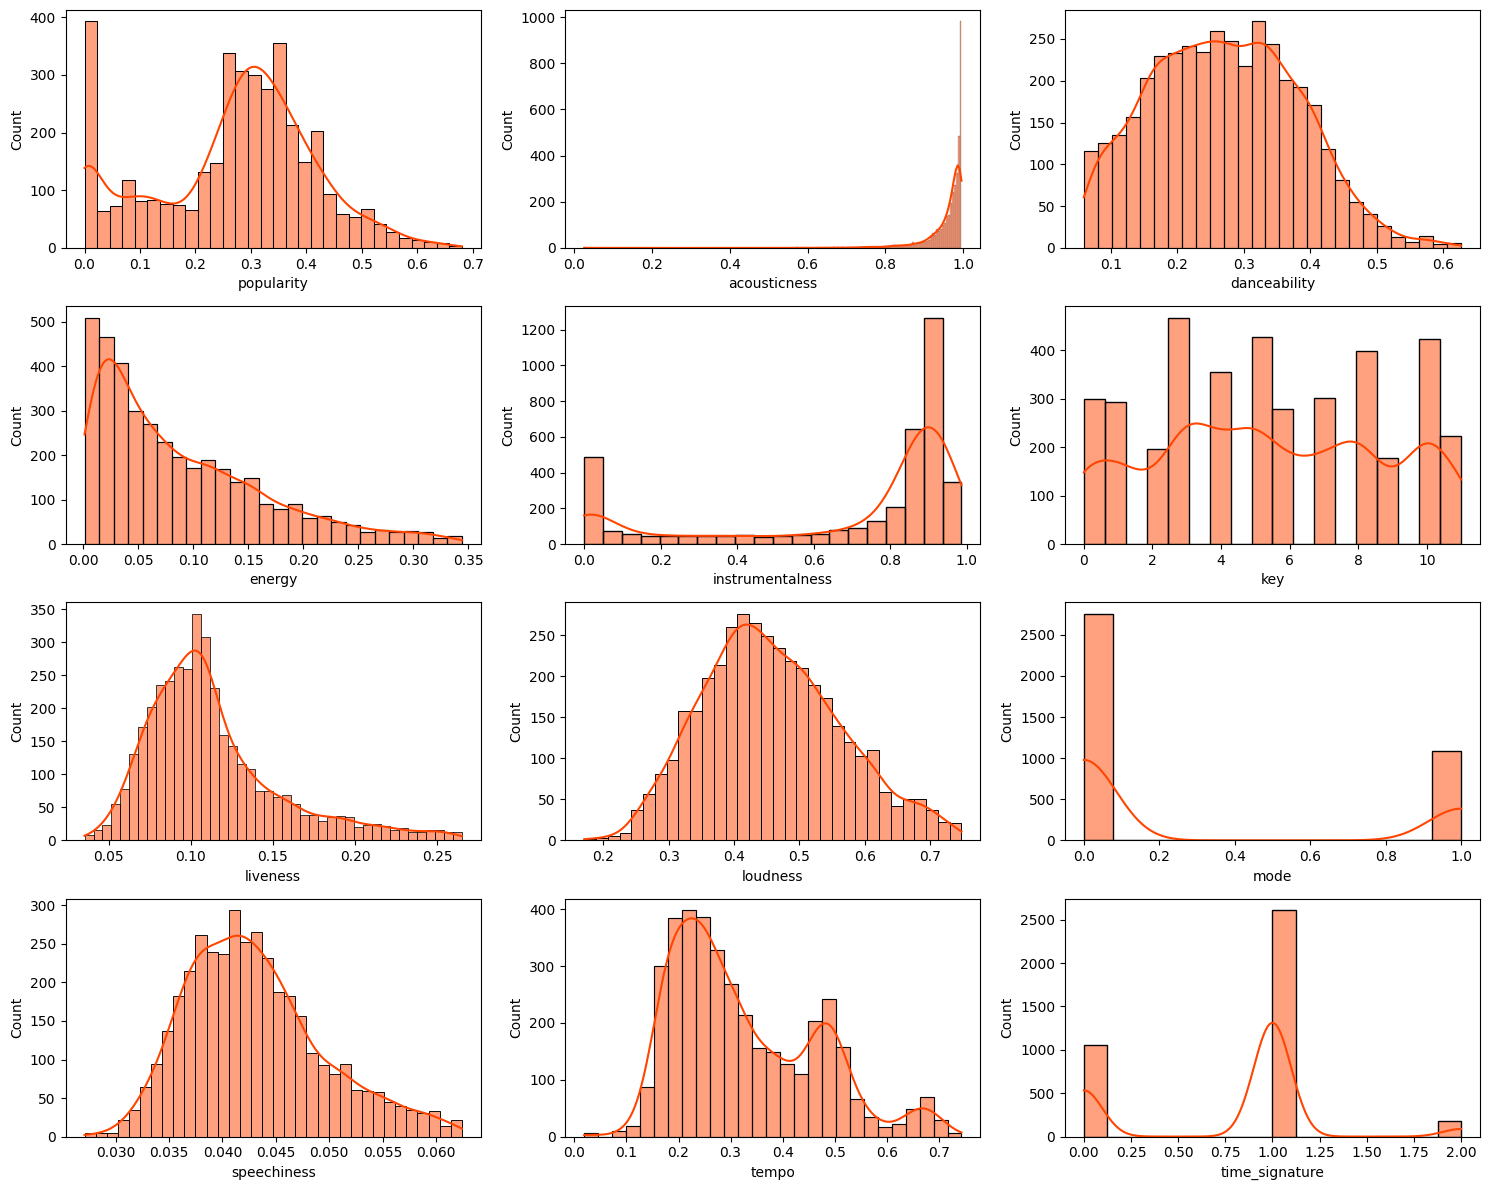

In [67]:
def histplots_classical(df):
    k = 0 # declara y asigna la variable k que luego será de utilidad para recorrer las columnas. En este caso es igual a 1 para evitar que se muestre
    cols = df.columns[:-1]
    n = 4 # declara y asigna la variable n que despues sera la cantidad de filas del grafico
    m = 3 # declara y asigna la variable m que despues sera la cantidad de columnas del grafico
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 12)) # Crea el lienzo del grafico
    #if (k > 17):
    #  None
    #else:
    for i in range(n): # recorre usando un for las filas
        for j in range(m): # recorre usando un for las columnas
            if k <= len(cols): # para evitar un indexerror, se agrega un if para que cuando llegue a la cantidad de columnas, se deje de recorrer el array.
                sns.histplot(df, x=df[df.columns[k]], ax=axes[i][j], kde=True, color='orangered') # crea el boxplot
                k += 1

    plt.tight_layout()
    plt.show()

histplots_classical(dataset_musica_academica)

In [68]:
dataset_musica_academica.describe()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,0.269984,0.958831,0.270877,0.088200,0.683376,5.440427,0.113266,0.458381,0.282778,0.043024,0.326062,0.769771,0.149039
std,0.145687,0.058900,0.110491,0.076385,0.335750,3.305086,0.041345,0.105637,0.450408,0.006444,0.137909,0.517517,0.128856
min,0.000000,0.025100,0.059200,0.001070,0.000000,0.000000,0.035400,0.170673,0.000000,0.027100,0.018671,0.000000,0.022100
25%,0.180000,0.951000,0.185000,0.027100,0.521750,3.000000,0.085600,0.382642,0.000000,0.038300,0.218049,0.000000,0.045700
50%,0.290000,0.978000,0.268000,0.065550,0.871000,5.000000,0.105000,0.448844,0.000000,0.042200,0.287163,1.000000,0.098950
75%,0.360000,0.991000,0.351000,0.131000,0.912000,8.000000,0.129000,0.527584,1.000000,0.046600,0.433564,1.000000,0.212000
max,0.680000,0.996000,0.627000,0.344000,0.986000,11.000000,0.265000,0.748156,1.000000,0.062400,0.743850,2.000000,0.555000


# 9. EDA

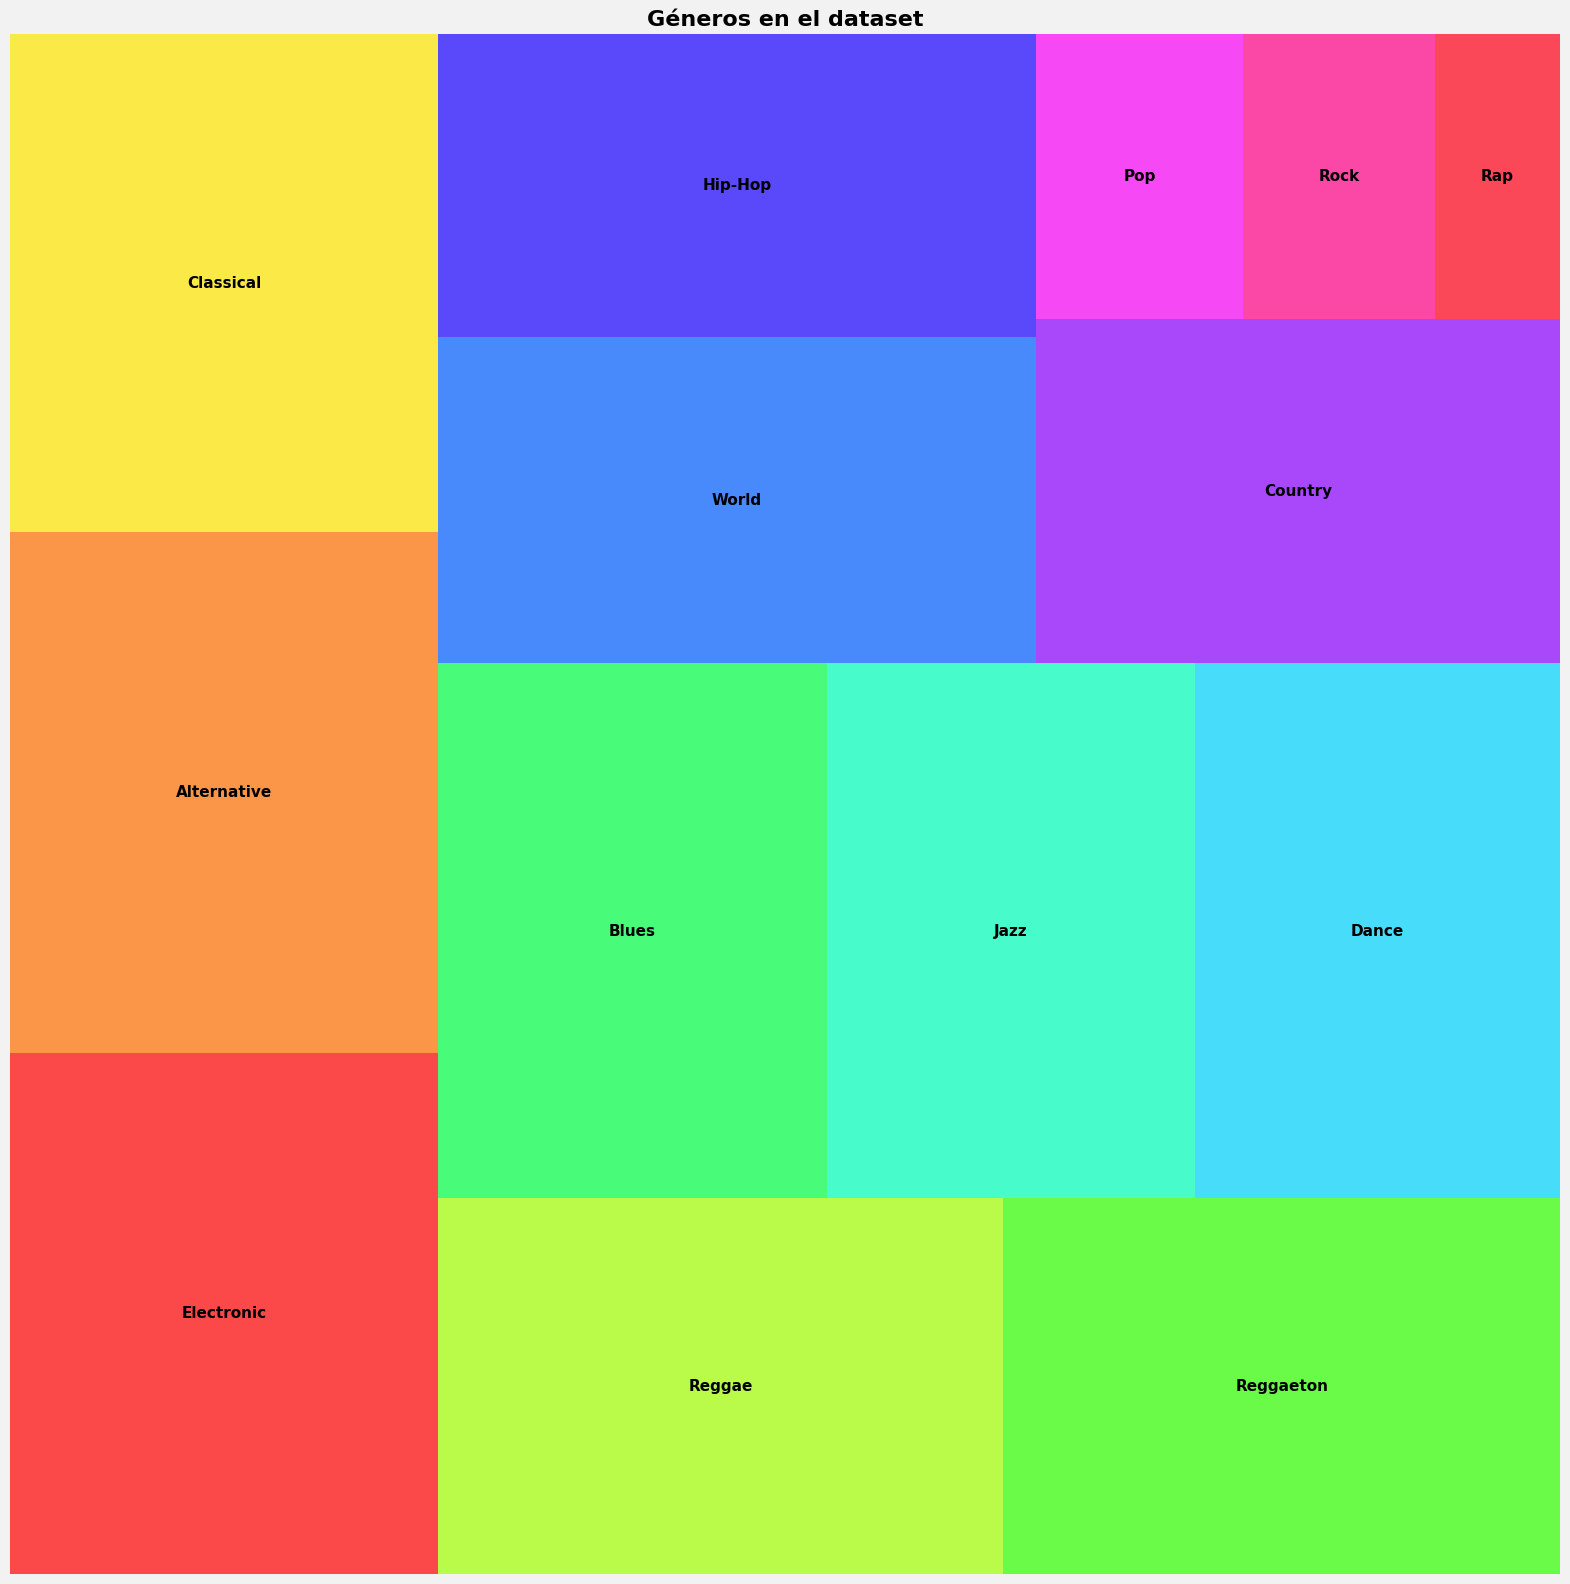

In [ ]:
# Grafico treemap

conteo_generos = spotify_transformer['genre'].value_counts()
lista_generos = list(zip(conteo_generos.index, conteo_generos.values))
lista_generos

# Extraer géneros y conteos por separado
generos = [item[0] for item in lista_generos]
conteos = [item[1] for item in lista_generos]

# colores
hues = np.linspace(0, 1, len(generos))
colors = [plt.cm.hsv(hue) for hue in hues]

# Recuperando nombre genero
nombre_genero = []

for i in generos:

  nombre_genero.append(identificador_generos.loc[identificador_generos['columna_transformed'] == i, 'columna_original'].iloc[0])


# Crear el treemap
plt.figure(figsize=(20, 20), facecolor='#F2F2F2')
plt.title("Géneros en el dataset", fontsize=16, fontweight='bold')
plt.axis('off')

squarify.plot(
    sizes=conteos,
    label=nombre_genero,
    alpha=0.7,
    color=colors,
    text_kwargs={'fontsize': 11, 'fontweight': 'bold'})

plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# Definir la función para crear el gráfico de radar

# Seleccionar los dos géneros y las características deseadas
genero1 = "Musica Clasica"
genero2 = 2
caracteristicas = ['popularity','acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'speechiness', 'liveness', 'loudness']

# Filtrar el dataset por los géneros seleccionados

datos_genero2 = spotify_transformer[spotify_transformer['genre'] == genero2]

# Obtener el nombre de los géneros seleccionados

nombre_genero2 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero2, 'columna_original'].iloc[0]

# Calcular la mediana de las características para cada género
medianas_genero1 = dataset_musica_academica[caracteristicas].median()
medianas_genero2 = datos_genero2[caracteristicas].median()

# Crear una lista circular para las características
caracteristicas_circular = caracteristicas + [caracteristicas[0]]

# Ajustar los valores para que coincidan con las etiquetas
medianas_genero1_circular = np.append(medianas_genero1, medianas_genero1[0])
medianas_genero2_circular = np.append(medianas_genero2, medianas_genero2[0])

# Calcular el ángulo para cada característica
angulos = np.linspace(0, 2 * np.pi, len(caracteristicas_circular), endpoint=False).tolist()


# Crear un gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angulos, medianas_genero1_circular, color='orangered', alpha=0.5, label=genero1)
ax.fill(angulos, medianas_genero1_circular, color='orangered', alpha=0.25)
ax.plot(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.5, label=nombre_genero2)
ax.fill(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.25)
ax.set_title(f'Gráfico de radar - {genero1} vs {nombre_genero2}', weight='bold', fontsize=12)
ax.legend()

# Configurar el rango y las etiquetas del gráfico de radar
ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(caracteristicas, fontsize=8)



# Función para actualizar el gráfico en cada cuadro de la animación
def update(frame):
    #genero2 = frame + 2  # Inicia en genero2 = 2 y va aumentando hasta genero2 = 13
    # Seleccionar los dos géneros y las características deseadas
    genero1 = "Musica Clasica"
    genero2 = frame + 2
    caracteristicas = ['popularity','acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'speechiness', 'liveness', 'loudness']

    # Filtrar el dataset por los géneros seleccionados

    datos_genero2 = spotify_transformer[spotify_transformer['genre'] == genero2]

    # Obtener el nombre de los géneros seleccionados

    nombre_genero2 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero2, 'columna_original'].iloc[0]

    # Calcular la mediana de las características para cada género
    medianas_genero1 = dataset_musica_academica[caracteristicas].median()
    medianas_genero2 = datos_genero2[caracteristicas].median()

    # Crear una lista circular para las características
    caracteristicas_circular = caracteristicas + [caracteristicas[0]]

    # Ajustar los valores para que coincidan con las etiquetas
    medianas_genero1_circular = np.append(medianas_genero1, medianas_genero1[0])
    medianas_genero2_circular = np.append(medianas_genero2, medianas_genero2[0])

    # Calcular el ángulo para cada característica
    angulos = np.linspace(0, 2 * np.pi, len(caracteristicas_circular), endpoint=False).tolist()

    # Crear un gráfico de radar
    #fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.clear()
    ax.plot(angulos, medianas_genero1_circular, color='orangered', alpha=0.5, label=genero1)
    ax.fill(angulos, medianas_genero1_circular, color='orangered', alpha=0.25)
    ax.plot(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.5, label=nombre_genero2)
    ax.fill(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.25)
    ax.set_title(f'Gráfico de radar - {genero1} vs {nombre_genero2}', weight='bold', fontsize=12)
    ax.legend()

    # Configurar el rango y las etiquetas del gráfico de radar
    ax.set_ylim(0, 1)
    ax.set_yticklabels([])
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(caracteristicas, fontsize=8)

# Crear la animación
num_frames = 12  # Genero2 variará desde 2 hasta 15
ani = FuncAnimation(fig, update, frames=num_frames, interval=1500)

# Mostrar la animación en el cuaderno
plt.close()  # Es necesario cerrar la figura inicial antes de mostrar la animación
HTML(ani.to_html5_video())


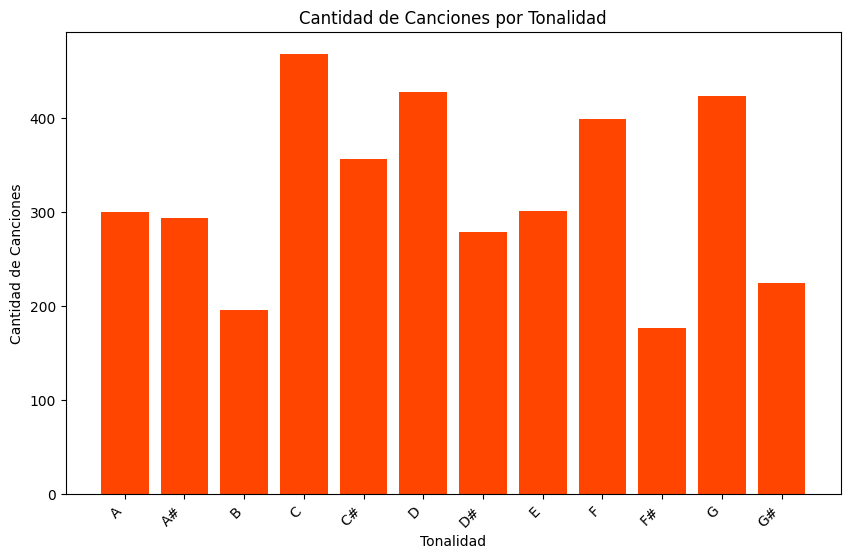

In [ ]:
# Contar la frecuencia de cada tonalidad y ordenar los resultados por la tonalidad
tonalidades_frecuencia = dataset_musica_academica['key'].value_counts().sort_index()

# Obtener los nombres de las tonalidades originales a partir del DataFrame "identificador_tonalidad"
tonalidades_nombres = identificador_tonalidad.set_index('columna_transformed').loc[tonalidades_frecuencia.index, 'columna_original']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tonalidades_nombres, tonalidades_frecuencia,color='orangered')
plt.xlabel('Tonalidad')
plt.ylabel('Cantidad de Canciones')
plt.title('Cantidad de Canciones por Tonalidad')
plt.xticks(rotation=45, ha="right")
plt.show()

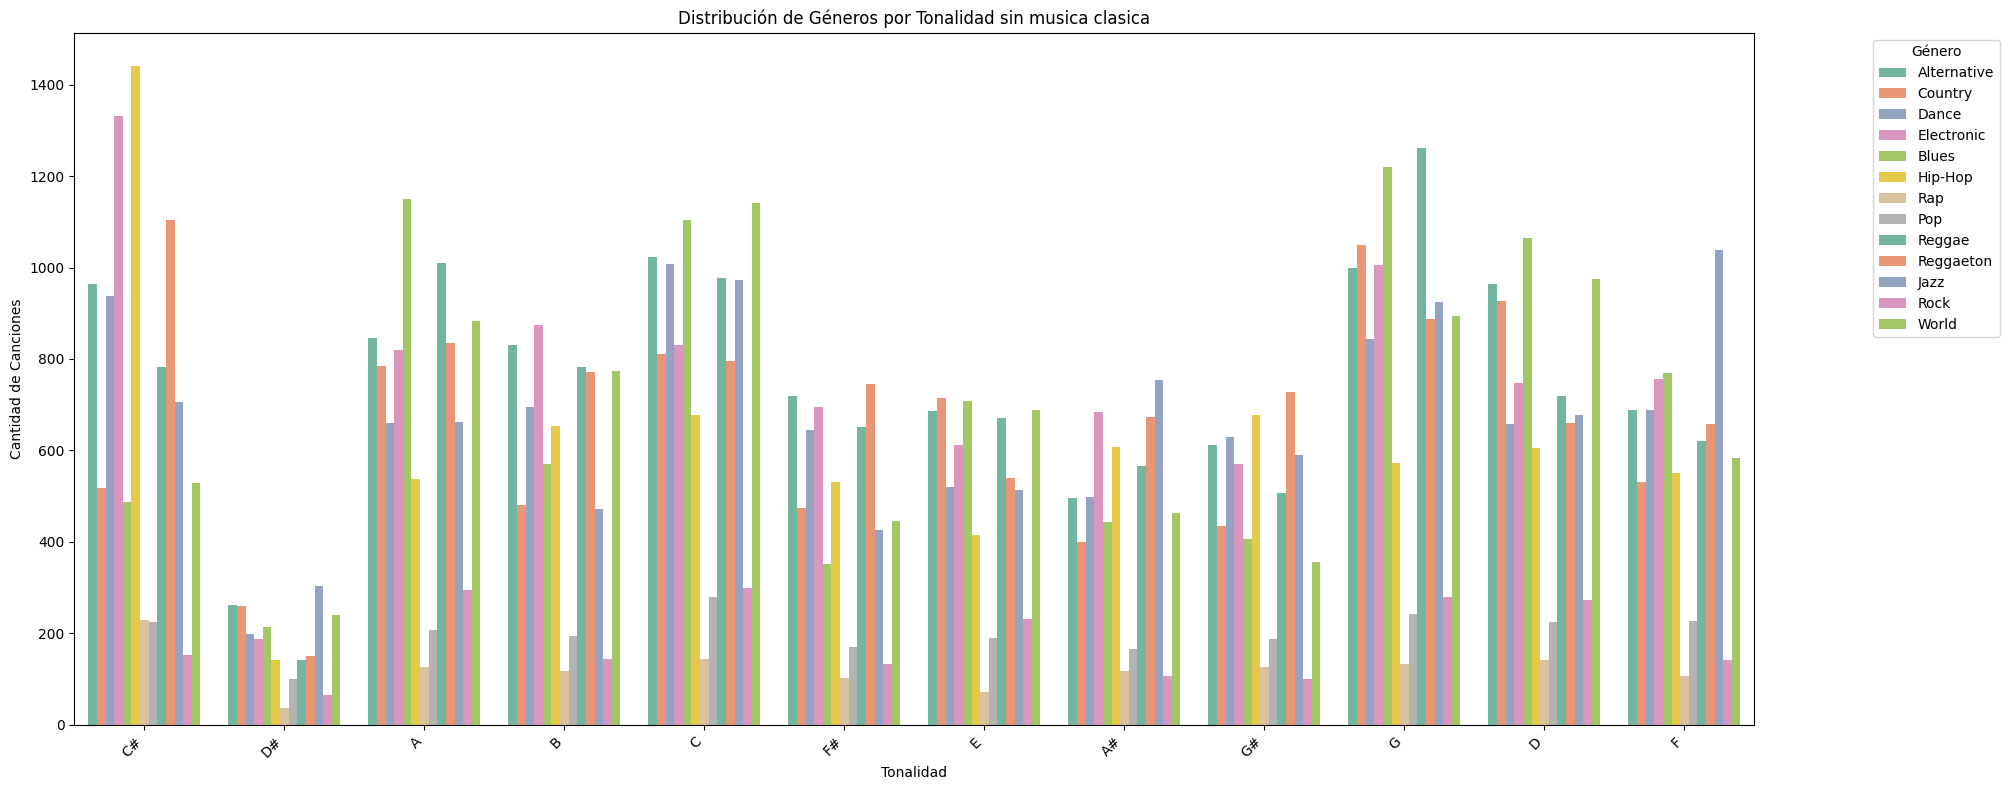

In [ ]:

# Combinar la información de las columnas "key" y "genre" en el DataFrame original
df_combined = spotify_transformer.copy()
df_combined['key_original'] = spotify_transformer['key'].map(identificador_tonalidad.set_index('columna_transformed')['columna_original'])
df_combined['genre_original'] = spotify_transformer['genre'].map(identificador_generos.set_index('columna_transformed')['columna_original'])

# Filtrar los datos donde 'genre' no sea igual a 2
df_combined_filtered = df_combined.query('genre != 2')

# Crear el gráfico de barras
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha="right")

# Utilizamos seaborn para el gráfico de barras con hue
sns.countplot(data=df_combined_filtered, x='key_original', hue='genre_original', palette='Set2')

plt.xlabel('Tonalidad')
plt.ylabel('Cantidad de Canciones')
plt.title('Distribución de Géneros por Tonalidad sin musica clasica')

# Ajustar el tamaño y la posición de la leyenda
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()  # Para asegurar que no haya superposición de elementos en el gráfico
plt.show()


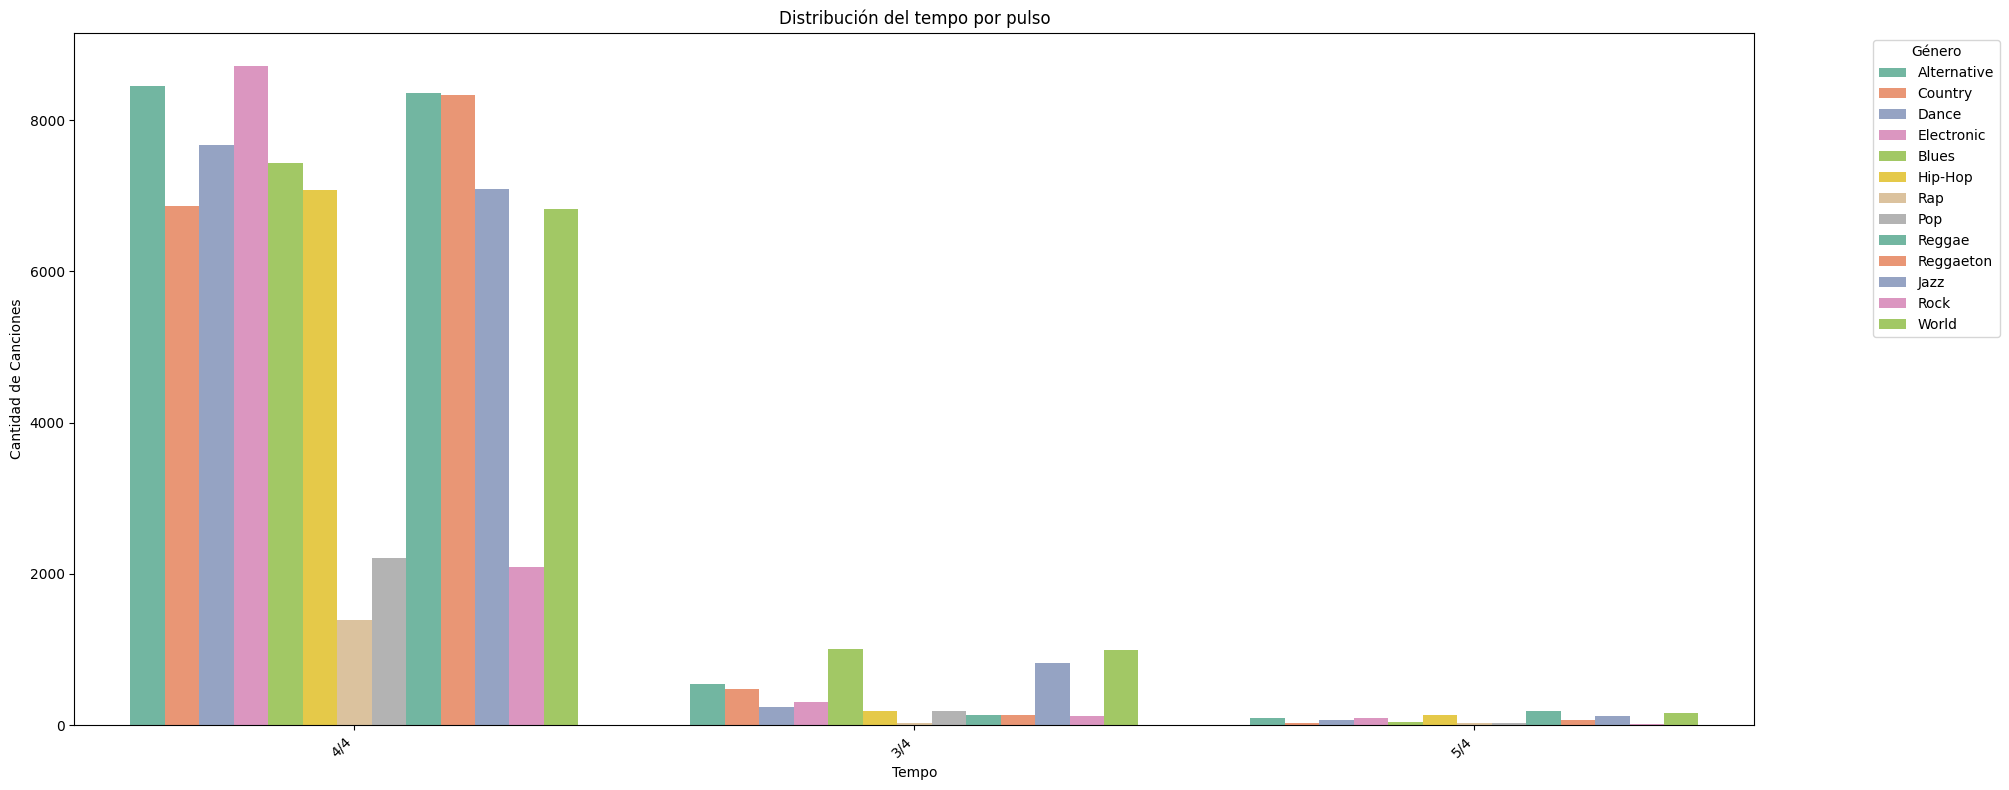

In [ ]:
# Combinar la información de las columnas "key" y "genre" en el dataframe original
df_combined = spotify_transformer.copy()
df_combined['key_original'] = spotify_transformer['time_signature'].map(identificador_tiempo.set_index('columna_transformed')['columna_original'])
df_combined['genre_original'] = spotify_transformer['genre'].map(identificador_generos.set_index('columna_transformed')['columna_original'])

df_combined_filtered = df_combined.query('genre != 2')

# Crear el gráfico de barras
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha="right")

# Utilizamos seaborn para el gráfico de barras con hue
sns.countplot(data=df_combined_filtered, x='key_original', hue='genre_original', palette='Set2')

plt.xlabel('Tempo')
plt.ylabel('Cantidad de Canciones')
plt.title('Distribución del tempo por pulso')

# Ajustar el tamaño y la posición de la leyenda
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()  # Para asegurar que no haya superposición de elementos en el gráfico
plt.show()

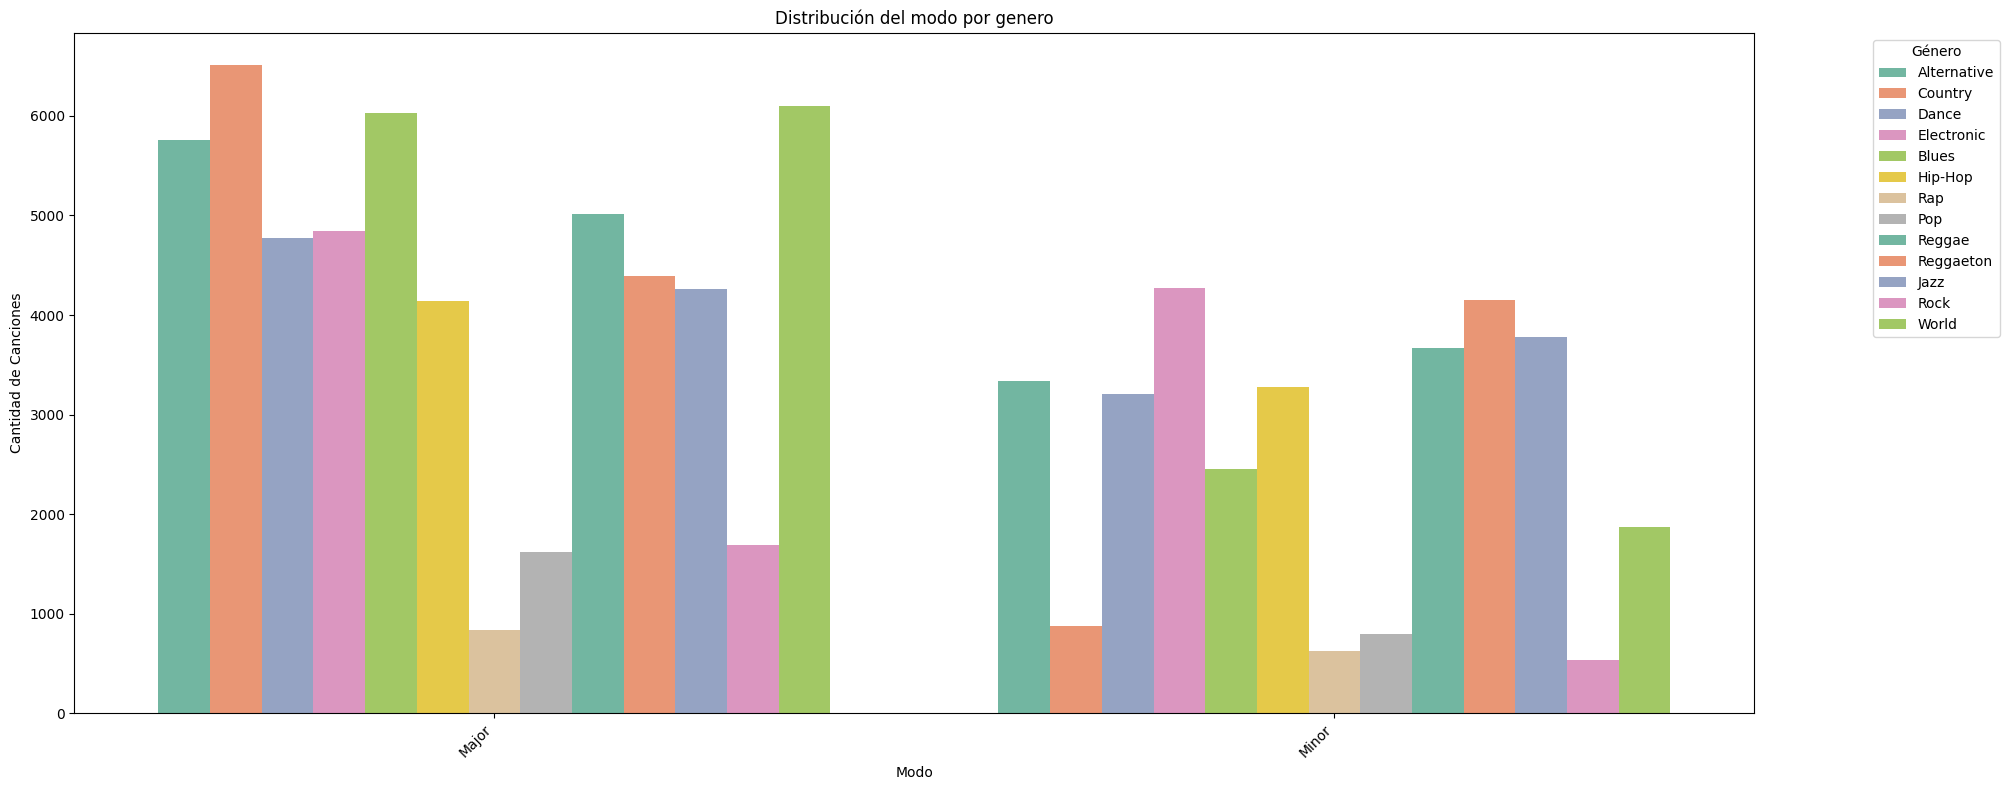

In [ ]:
# Combinar la información de las columnas "key" y "genre" en el dataframe original
df_combined = spotify_transformer.copy()
df_combined['key_original'] = spotify_transformer['mode'].map(identificador_modo.set_index('columna_transformed')['columna_original'])
df_combined['genre_original'] = spotify_transformer['genre'].map(identificador_generos.set_index('columna_transformed')['columna_original'])

df_combined_filtered = df_combined.query('genre != 2')

# Crear el gráfico de barras
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha="right")

# Utilizamos seaborn para el gráfico de barras con hue
sns.countplot(data=df_combined_filtered, x='key_original', hue='genre_original', palette='Set2')

plt.xlabel('Modo')
plt.ylabel('Cantidad de Canciones')
plt.title('Distribución del modo por genero')

# Ajustar el tamaño y la posición de la leyenda
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()  # Para asegurar que no haya superposición de elementos en el gráfico
plt.show()

In [ ]:
# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

genero1 = 1
genero2 = 2
sns.histplot(x="tempo", data=spotify_transformer[spotify_transformer["genre"] == genero1], color = "orangered", ax=axs[0])
sns.histplot(x="tempo", data=spotify_transformer[spotify_transformer["genre"] == genero2], color = "forestgreen", ax=axs[1])

# Obtener el nombre de los géneros seleccionados
nombre_genero1 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero1, 'columna_original'].iloc[0]
nombre_genero2 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero2, 'columna_original'].iloc[0]

# titulo, eje x e y
axs[0].set_title(f'Histplot tempo - {nombre_genero1}')
axs[0].set_ylabel('Cantidad registros')
axs[1].set_title(f'Histplot tempo - {nombre_genero2}')
axs[1].set_ylabel('Cantidad registros')

def update(frame):
    genero2 = frame + 2
    # Obtener el nombre de los géneros seleccionados
    nombre_genero2 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero2, 'columna_original'].iloc[0]

    # titulo, eje x e y
    axs[1].clear()  # Limpiar el segundo eje para actualizar el histograma del segundo género
    sns.histplot(x="tempo", data=spotify_transformer[spotify_transformer["genre"] == genero2], color = "forestgreen", ax=axs[1])
    axs[1].set_title(f'Histplot tempo - {nombre_genero2}')
    axs[1].set_ylabel('Cantidad registros')

# Crear la animación
num_frames = 10  # Genero2 variará desde 2 hasta 15 (num_frames + 2)
ani = FuncAnimation(fig, update, frames=num_frames, interval=1500)

# Mostrar la animación en el cuaderno
plt.close()  # Es necesario cerrar la figura inicial antes de mostrar la animación
HTML(ani.to_html5_video())


In [ ]:
spotify_transformer.head(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,
5ICoYTFfmUKguBHpINKkGL,2,1193,39145,0.45,0.00821,0.551,0.704,0.000002,11,0.2450,0.113994,0,0.0444,97.075,1,0.541
0rk6JE7ODyGWWquK4y7t1u,2,4013,58507,0.42,0.02720,0.375,0.859,0.000000,10,0.2670,0.068132,0,0.0569,74.059,1,0.597
3vMwtAfDNM8dDBWMvS78pn,2,6180,10781,0.46,0.69000,0.699,0.408,0.000219,2,0.1450,0.240761,0,0.0960,171.922,1,0.842
7IJlk42gDKt5dfSSLwtEsp,2,4605,10595,0.54,0.15200,0.555,0.726,0.000178,5,0.1480,0.187798,0,0.0368,107.719,1,0.505
2JxSaSRavL82FCTCPzVmEf,2,1410,3866,0.42,0.57100,0.640,0.478,0.000000,2,0.0902,0.146222,0,0.0330,136.717,1,0.315


NameError: ignored

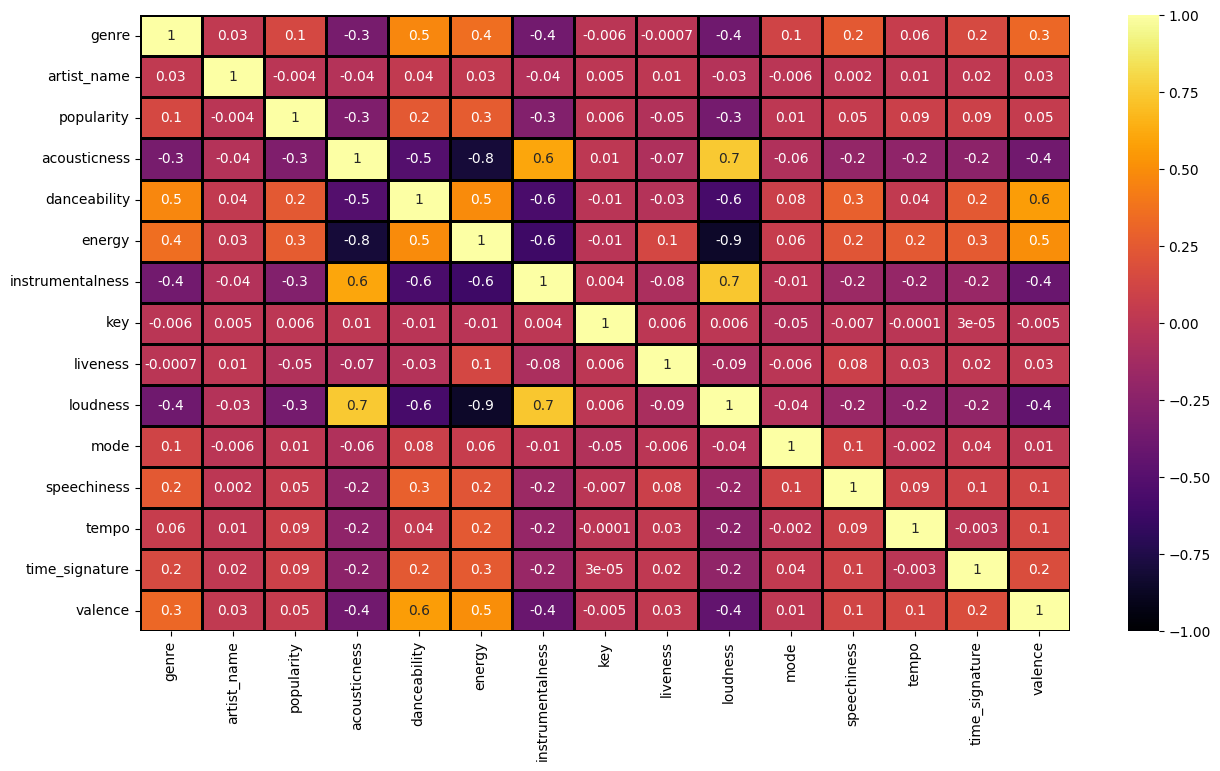

In [ ]:
plt.figure(figsize=(15,8))

sns.heatmap(spotify_transformer.drop(['track_name'], axis=1).corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap ='inferno', center=0, linewidths=1, linecolor="Black")
heatmap.set_title("Correlacion HeatMap entre Variable - Totalidad dataset")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

NameError: ignored

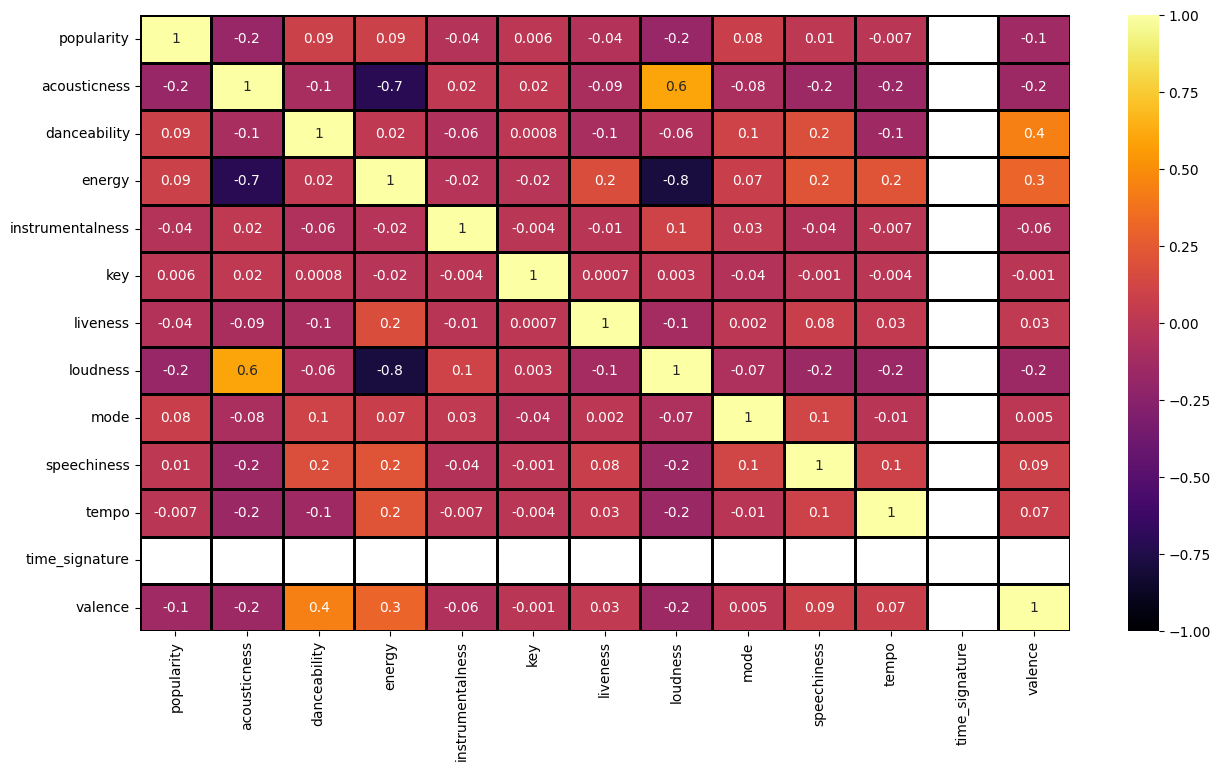

In [ ]:
dataset_musica_academica
plt.figure(figsize=(15,8))

sns.heatmap(dataset_canciones.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap ='inferno', center=0, linewidths=1, linecolor="Black")
heatmap.set_title("Correlacion HeatMap entre Variable - Totalidad dataset")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

NameError: ignored

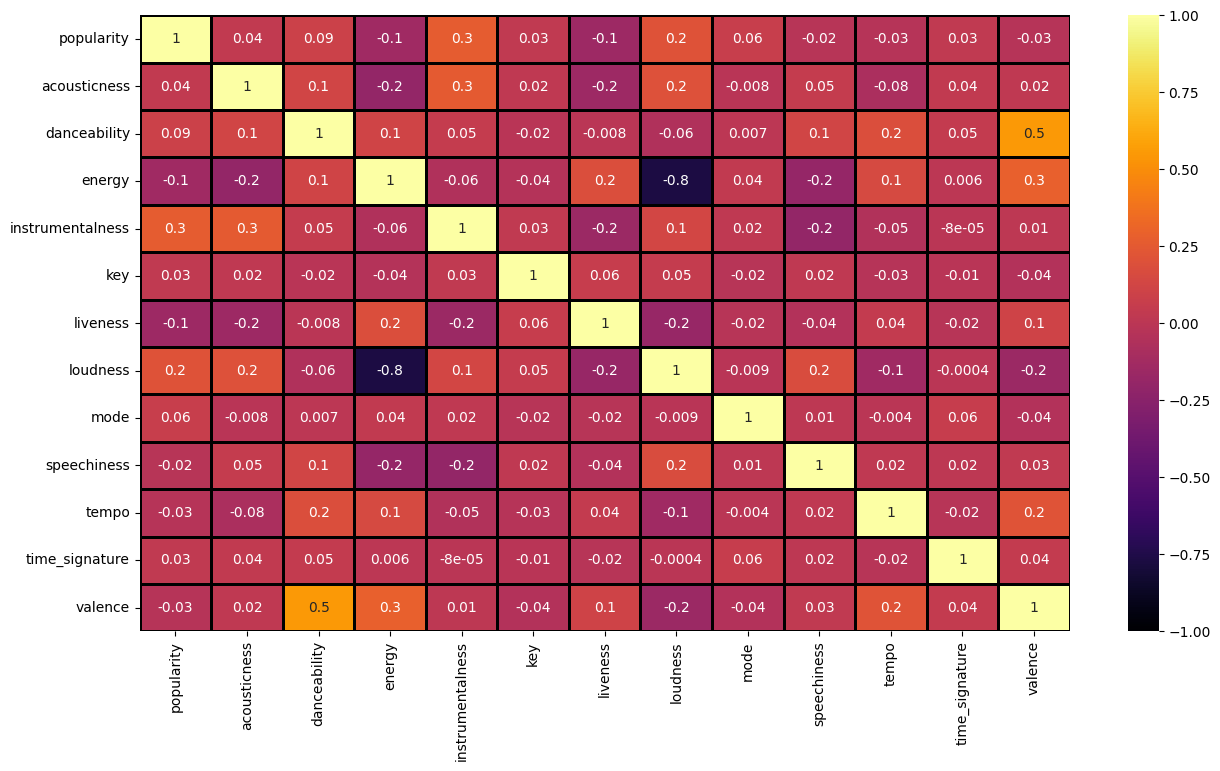

In [ ]:
dataset_musica_academica
plt.figure(figsize=(15,8))

sns.heatmap(dataset_musica_academica.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1,cmap ='inferno', center=0, linewidths=1, linecolor="Black")
heatmap.set_title("Correlacion HeatMap entre Variable - Totalidad dataset")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

# 10. Buscador de artistas y canciones

In [ ]:
# Seleccionar nombre del artista
nombre_artista = 'Pearl Jam'

# Utilizando loc, busca el número asignado en la columna 'columna_transformed' para el artista dado
numero_asignado = identificador_nombre_artista.loc[identificador_nombre_artista['columna_original'] == nombre_artista, 'columna_transformed'].values[0]
numero_asignado

# Filtra las filas del DataFrame 'spotify_transformer' donde el valor de la columna 'columna_transformed' coincide con 'numero_asignado'
tracks_artista = spotify_transformer.loc[spotify_transformer['artist_name'] == numero_asignado]

# Obtén todos los track_id que coinciden con el número del artista
track_ids_coincidentes = tracks_artista.index.tolist()

# Filtra las filas del DataFrame 'dataset_canciones' cuyo índice (track_id) coincide con los valores de 'track_ids_coincidentes'
canciones_coincidentes = dataset_canciones.loc[dataset_canciones.index.isin(track_ids_coincidentes)]

spotify_coincidentes = spotify.loc[spotify['track_id'].isin(track_ids_coincidentes), ['genre', 'artist_name', 'track_name', 'track_id']]
spotify_coincidentes

,genre,artist_name,track_name,track_id
1192,Alternative,Pearl Jam,Even Flow,6QewNVIDKdSl8Y3ycuHIei
1212,Alternative,Pearl Jam,Alive,1L94M3KIu7QluZe63g64rv
1285,Alternative,Pearl Jam,Jeremy,62nQ8UZVqR2RMvkJHkcO2o
1361,Alternative,Pearl Jam,Black,5Xak5fmy089t0FYmh3VJiY
1497,Alternative,Pearl Jam,Last Kiss,0QnONzv3TvHAWk294h6DaQ
...,...,...,...,...
222018,Rock,Pearl Jam,Better Man - Remastered,2B98ljvzqpCVgt5reTHq28
222204,Rock,Pearl Jam,Daughter (Remastered),53eJFr4Mfbw5PXJ01K6cFw
222321,Rock,Pearl Jam,Just Breathe,6i81qFkru6Kj1IEsB7KNp2
222910,Rock,Pearl Jam,Elderly Woman Behind the Counter in a Small To...,5lHgBqh9VwAAzQma55gHRY


Al introducir el nombre del artista deseado se buscan todos aquellos registros que se encuentran en el dataset "dataset_canciones". Mediante la aplicacion de algunos filtros se devuelve el nombre del artista, el genero, el nombre de la cancion y el track_id. Este ultimo sera de importancia para encontrar el top 15 de canciones de musica clasica que mejor se ajustan a lo buscado.

# 11. Modelo coseno SN2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Introducimos el track_id de la cancion que buscamos encontrar parecidos en musica clasica.
playlist_vector = dataset_canciones.loc["6QewNVIDKdSl8Y3ycuHIei"]

En esta variable se va a guardar la cancion con todas las caracteristicas deseadas.

In [ ]:
# Definimos la funcion que va a realizar la similitud coseno.

def generate_recommendation2(spotify_data, playlist_vector):
    non_playlist = spotify_data.copy()
    non_playlist['sim'] = cosine_similarity(non_playlist, playlist_vector.values.reshape(1, -1)).flatten()
    non_playlist_top15 = non_playlist.sort_values('sim', ascending=False).head(15)

    return non_playlist_top15

In [ ]:
# Llamamos a la funcion y la asignamos a una variable llamada top15
top15 = generate_recommendation2(dataset_musica_academica, playlist_vector) # la funcion recive dos parametros. Uno el dataset de musica clasica; otro la cancion.

In [ ]:
track_recomendaciones_coincidentes = top15.index.tolist()

recomendaciones = spotify.loc[(spotify['track_id'].isin(track_recomendaciones_coincidentes)) & (spotify["genre"] == "Classical"), ['artist_name', 'track_name', 'track_id']]

# Crea un nuevo DataFrame combinando 'recomendaciones' con 'top15' utilizando 'track_id' como clave de combinación
recomendaciones = recomendaciones.merge(top15[['sim']], left_on='track_id', right_index=True)

# Ordena el DataFrame 'recomendaciones' por la columna 'sim' en orden descendente (de mayor a menor similitud)
recomendaciones = recomendaciones.sort_values(by='sim', ascending=False)
recomendaciones

,artist_name,track_name,track_id,sim
128008,Antonio Vivaldi,"Concerto for Violin in B Minor, RV 390: II. Al...",13MOgoXrWfakd43GhcvqgD,0.837346
125377,Johann Sebastian Bach,Concerto n°5 en Ré majeur BWV 1050: II. Affett...,1rnI1rsLsAxitG1OkAFkaY,0.787116
104456,Johann Sebastian Bach,"Violin Partita No. 1 in B Minor, BWV 1002: VI....",1w2WK99C9CecKFIx0Bixc3,0.776302
125339,Pyotr Ilyich Tchaikovsky,"Swan Lake, Op. 20, TH 12: Introduction",07ttZtCahczekhZKugBgC0,0.770079
128751,Franz Schubert,Der Erlkönig D328 - 1988 Remastered Version,0hES7IYAQSwBAPXJeLKcGN,0.769661
125908,Pyotr Ilyich Tchaikovsky,"Marche slave (Slavonic March), Op. 31",4L9io4XpkeysnBBbn6VH3r,0.763754
126396,Johann Sebastian Bach,"Unaccompanied Cello Suite No. 3 in C Major, BW...",3zlb7mz635ltIeTR1Ok8i1,0.760853
124282,Johann Sebastian Bach,"Mass in B Minor, BWV 232: Agnus Dei: Agnus Dei...",0A4hDJSHcYLwqYQGUWx3w9,0.756895
104503,Johann Sebastian Bach,"St. John Passion, BWV 245, Pt. 2: No. 29, Und ...",55i7oO30nN0397BxwKstdj,0.756499
126279,Wolfgang Amadeus Mozart,"Requiem, K. 626: Domine Jesu",68eQbwEnyA642lmpoJG5wS,0.756400


Mediante el input(cancion deseada) se busca en todo el dataset de musica clasica aquellas canciones que mayor similitud coseno tengan. Aquellas que esten mas cerca del 1, serán las que devuelva el sistema.

# Funciones EDA

In [ ]:
# Funcion para realizar grafico de radar

def grafico_radar(genero_1, genero_2):
  # Seleccionar los dos géneros y las características deseadas
  genero1 = genero_1
  genero2 = genero_2
  caracteristicas = ['popularity', 'acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'speechiness', 'liveness', 'loudness']

  # Filtrar el dataset por los géneros seleccionados
  datos_genero1 = spotify_transformer[spotify_transformer['genre'] == genero1]
  datos_genero2 = spotify_transformer[spotify_transformer['genre'] == genero2]

  # Obtener el nombre de los géneros seleccionados
  nombre_genero1 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero1, 'columna_original'].iloc[0]
  nombre_genero2 = identificador_generos.loc[identificador_generos['columna_transformed'] == genero2, 'columna_original'].iloc[0]

  # Calcular la mediana de las características para cada género
  medianas_genero1 = datos_genero1[caracteristicas].median()
  medianas_genero2 = datos_genero2[caracteristicas].median()

  # Crear una lista circular para las características
  caracteristicas_circular = caracteristicas + [caracteristicas[0]]

  # Ajustar los valores para que coincidan con las etiquetas
  medianas_genero1_circular = np.append(medianas_genero1, medianas_genero1[0])
  medianas_genero2_circular = np.append(medianas_genero2, medianas_genero2[0])

  # Calcular el ángulo para cada característica
  angulos = np.linspace(0, 2 * np.pi, len(caracteristicas_circular), endpoint=False).tolist()

  # Crear un gráfico de radar
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
  ax.plot(angulos, medianas_genero1_circular, color='orangered', alpha=0.5, label=nombre_genero1)
  ax.fill(angulos, medianas_genero1_circular, color='orangered', alpha=0.25)
  ax.plot(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.5, label=nombre_genero2)
  ax.fill(angulos, medianas_genero2_circular, color='forestgreen', alpha=0.25)
  ax.set_title(f'Grafico de radar - {nombre_genero1} vs {nombre_genero2}', weight='bold', fontsize=12)
  ax.legend()

  # Configurar el rango y las etiquetas del gráfico de radar
  ax.set_ylim(0, 1)
  ax.set_yticklabels([])
  ax.set_xticks(angulos[:-1])
  ax.set_xticklabels(caracteristicas, fontsize=8)

  # Mostrar el gráfico de radar
  plt.show()